In [453]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt,seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Read Data 

In [454]:
#read application data
inp0=pd.read_csv("application_data.csv")
inp0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [456]:
#read previous_application data
inp1=pd.read_csv("previous_application.csv")
inp1.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [457]:
inp0.shape

(307511, 122)

In [458]:
inp1.shape

(1670214, 37)

In [459]:
inp0.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [460]:
inp0.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [461]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


### Cleaning missing values

In [462]:
# number of null values columns having more than 30%

null_col=inp0.isnull().sum()
null_col=null_col[null_col.values>(0.3*len(null_col))]
len(null_col)

64

In [463]:
# Drooping null values, which are > 30%
null_col = list(null_col[null_col.values>=0.3].index)
inp0.drop(labels=null_col,axis=1,inplace=True)
print(len(null_col))
# here we dropped null value colunms whcih are 64 columns

64


In [464]:
#Validate null count in application data

inp0.isnull().sum()

SK_ID_CURR                      0
TARGET                          0
NAME_CONTRACT_TYPE              0
CODE_GENDER                     0
FLAG_OWN_CAR                    0
FLAG_OWN_REALTY                 0
CNT_CHILDREN                    0
AMT_INCOME_TOTAL                0
AMT_CREDIT                      0
AMT_ANNUITY                    12
NAME_INCOME_TYPE                0
NAME_EDUCATION_TYPE             0
NAME_FAMILY_STATUS              0
NAME_HOUSING_TYPE               0
REGION_POPULATION_RELATIVE      0
DAYS_BIRTH                      0
DAYS_EMPLOYED                   0
DAYS_REGISTRATION               0
DAYS_ID_PUBLISH                 0
FLAG_MOBIL                      0
FLAG_EMP_PHONE                  0
FLAG_WORK_PHONE                 0
FLAG_CONT_MOBILE                0
FLAG_PHONE                      0
FLAG_EMAIL                      0
CNT_FAM_MEMBERS                 2
REGION_RATING_CLIENT            0
REGION_RATING_CLIENT_W_CITY     0
WEEKDAY_APPR_PROCESS_START      0
HOUR_APPR_PROC

In [465]:
#Validate null %  in application ddta
inp0.isnull().sum()/len(inp0)*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.003902
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
FLAG_MOBIL                     0.000000
FLAG_EMP_PHONE                 0.000000
FLAG_WORK_PHONE                0.000000
FLAG_CONT_MOBILE               0.000000
FLAG_PHONE                     0.000000
FLAG_EMAIL                     0.000000


In [466]:
# in AMT_ANNUTY columns its has minor null values so willl impute those values 
inp0.AMT_ANNUITY.isnull().sum()

12

<AxesSubplot:xlabel='AMT_ANNUITY'>

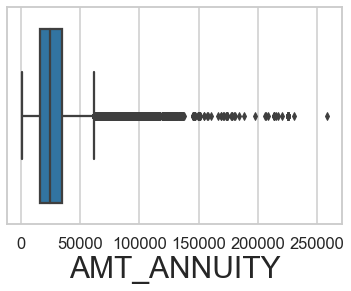

In [467]:
# AMT_ANNUITY is float type and lets check out liers
sns.boxplot(inp0["AMT_ANNUITY"])

Here in this AMT_ANNUITY colunnms has more outliers, so will use median to impute this column 

In [468]:
inp0.AMT_ANNUITY.median()

24903.0

In [469]:
# Filling missing values with median

val_AA=inp0['AMT_ANNUITY'].median()

inp0["AMT_ANNUITY"]=inp0["AMT_ANNUITY"].fillna(val_AA)


In [470]:
#Varify 
inp0.AMT_ANNUITY.isnull().sum()

0

In [471]:
inp0.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
CNT_FAM_MEMBERS                2
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
REG_REGION

In [472]:
# Check in CNT_FAM_MEMBERS column
inp0.CNT_FAM_MEMBERS.isnull().sum()

2

<AxesSubplot:xlabel='CNT_FAM_MEMBERS'>

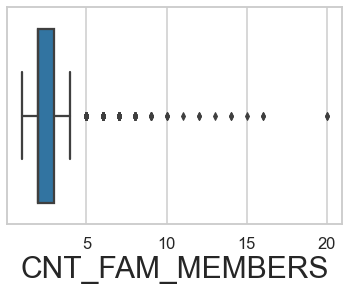

In [473]:
# check outlires
sns.boxplot(inp0["CNT_FAM_MEMBERS"])

In [474]:
#for this also will use medien to impute

val_CFM=inp0['CNT_FAM_MEMBERS'].median()

inp0["CNT_FAM_MEMBERS"]=inp0["CNT_FAM_MEMBERS"].fillna(val_CFM)


In [475]:
# verify column
inp0.CNT_FAM_MEMBERS.isnull().sum()

0

In [476]:
inp0.DAYS_LAST_PHONE_CHANGE.isnull().sum()      

1

<AxesSubplot:xlabel='DAYS_LAST_PHONE_CHANGE'>

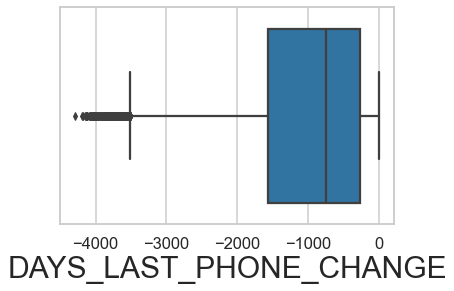

In [477]:
# check outlires
sns.boxplot(inp0["DAYS_LAST_PHONE_CHANGE"])

In [478]:
#for this also will use medien to impute

val_DLPC=inp0['DAYS_LAST_PHONE_CHANGE'].median()

inp0["DAYS_LAST_PHONE_CHANGE"]=inp0["DAYS_LAST_PHONE_CHANGE"].fillna(val_DLPC)


In [479]:
inp0.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
REG_REGION

In [480]:
# Verify null count
null_col=inp0.isnull().sum()
null_col=null_col[null_col.values>(0.3*len(null_col))]
len(null_col)

0

In [481]:
# removing unwanted columns from application dataset

unwanted_app_col=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

inp0.drop(labels=unwanted_app_col,axis=1,inplace=True)

In [482]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 28 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  NAME_INCOME_TYPE             307511 non-null  object 
 11  NAME_EDUCATION_TYPE          307511 non-null  object 
 12  NAME_FAMILY_STATUS           307511 non-null  object 
 13 

In [483]:
inp0.shape

(307511, 28)

 ### Categorical univariate analysis 

In [484]:
# findinf categorical columns having these 'XNA' values
    
# For Gender column

inp0[inp0['CODE_GENDER']=='XNA'].shape

(4, 28)

In [485]:
# For Organization column

inp0[inp0['ORGANIZATION_TYPE']=='XNA'].shape

(55374, 28)

So there we cansee 4 rows from CODE_GENDER  and 55374 from ORGANIZATION_TYPE columns are having XNA value means (Not Available)

In [486]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 28 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  NAME_INCOME_TYPE             307511 non-null  object 
 11  NAME_EDUCATION_TYPE          307511 non-null  object 
 12  NAME_FAMILY_STATUS           307511 non-null  object 
 13 

In [487]:
inp0.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

Here max is F(Female), so replace or impute 4 XNA with F

In [488]:
# replacing column 'CODE_GENDER' with "F" in dataset

inp0.loc[inp0['CODE_GENDER']=='XNA','CODE_GENDER']='F'
inp0['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [489]:
inp0['ORGANIZATION_TYPE'].describe()

count                     307511
unique                        58
top       Business Entity Type 3
freq                       67992
Name: ORGANIZATION_TYPE, dtype: object

In [490]:
inp0.ORGANIZATION_TYPE.value_counts()


Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [491]:

#here XNA have count 55374, which is 18%, so we can drop these columns as it will not have much impact 
100 * 55374/307511

18.00716071945394

In [492]:
# Hence, dropping the rows of total 55374 have 'XNA' values in the organization type column

inp_0=inp0.drop(inp0.loc[inp0['ORGANIZATION_TYPE']=='XNA'].index)


In [493]:
inp_0[inp_0['ORGANIZATION_TYPE']=='XNA'].shape

(0, 28)

#### Checking datatyps of the cloumns

In [494]:
inp_0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DAYS_ID_PUBLISH,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-2120,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,-291,MONDAY,11,0,0,0,0,0,0,School
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,-2531,MONDAY,9,0,0,0,0,0,0,Government
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,-2437,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,-3458,THURSDAY,11,0,0,0,0,1,1,Religion


In [495]:
inp_0.shape

(252137, 28)

In [496]:
inp_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252137 entries, 0 to 307510
Data columns (total 28 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   252137 non-null  int64  
 1   TARGET                       252137 non-null  int64  
 2   NAME_CONTRACT_TYPE           252137 non-null  object 
 3   CODE_GENDER                  252137 non-null  object 
 4   FLAG_OWN_CAR                 252137 non-null  object 
 5   FLAG_OWN_REALTY              252137 non-null  object 
 6   CNT_CHILDREN                 252137 non-null  int64  
 7   AMT_INCOME_TOTAL             252137 non-null  float64
 8   AMT_CREDIT                   252137 non-null  float64
 9   AMT_ANNUITY                  252137 non-null  float64
 10  NAME_INCOME_TYPE             252137 non-null  object 
 11  NAME_EDUCATION_TYPE          252137 non-null  object 
 12  NAME_FAMILY_STATUS           252137 non-null  object 
 13 

In [497]:
# Casting all variable into numeric in the dataset

numeric_col=['TARGET','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','REGION_POPULATION_RELATIVE','DAYS_BIRTH',
                'DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','HOUR_APPR_PROCESS_START','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']

inp_0[numeric_col]=inp_0[numeric_col].apply(pd.to_numeric)
inp_0.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DAYS_ID_PUBLISH,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-2120,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,-291,MONDAY,11,0,0,0,0,0,0,School
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,-2531,MONDAY,9,0,0,0,0,0,0,Government
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,-2437,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,-3458,THURSDAY,11,0,0,0,0,1,1,Religion


In [498]:
inp_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252137 entries, 0 to 307510
Data columns (total 28 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   252137 non-null  int64  
 1   TARGET                       252137 non-null  int64  
 2   NAME_CONTRACT_TYPE           252137 non-null  object 
 3   CODE_GENDER                  252137 non-null  object 
 4   FLAG_OWN_CAR                 252137 non-null  object 
 5   FLAG_OWN_REALTY              252137 non-null  object 
 6   CNT_CHILDREN                 252137 non-null  int64  
 7   AMT_INCOME_TOTAL             252137 non-null  float64
 8   AMT_CREDIT                   252137 non-null  float64
 9   AMT_ANNUITY                  252137 non-null  float64
 10  NAME_INCOME_TYPE             252137 non-null  object 
 11  NAME_EDUCATION_TYPE          252137 non-null  object 
 12  NAME_FAMILY_STATUS           252137 non-null  object 
 13 

In [ ]:
inp_0.info()

In [499]:
inp_0.WEEKDAY_APPR_PROCESS_START.head() 

0    WEDNESDAY
1       MONDAY
2       MONDAY
3    WEDNESDAY
4     THURSDAY
Name: WEEKDAY_APPR_PROCESS_START, dtype: object

In [500]:
inp_0.FLAG_OWN_REALTY.head() 

0    Y
1    N
2    Y
3    Y
4    Y
Name: FLAG_OWN_REALTY, dtype: object

###### some columns for ex. age/days columns are have -ve value, so it needs to converted to +ve once 

-ve columns : 'DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE',

So here will use abs() function,it can changed negative numbers to positive with the help of the in-built method provided in the Python library.However, also -abs () is used, to convert a positive number to a negative number. 

In [ ]:
# changing '-ve' values into '+ve' Values
inp_0['DAYS_BIRTH'] = inp_0['DAYS_BIRTH'].abs()
inp_0['DAYS_EMPLOYED'] = inp_0['DAYS_EMPLOYED'].abs()
inp_0['DAYS_REGISTRATION'] = inp_0['DAYS_REGISTRATION'].abs()
inp_0['DAYS_ID_PUBLISH'] = inp_0['DAYS_ID_PUBLISH'].abs()


In [501]:
#verify columns once 
inp_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252137 entries, 0 to 307510
Data columns (total 28 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   252137 non-null  int64  
 1   TARGET                       252137 non-null  int64  
 2   NAME_CONTRACT_TYPE           252137 non-null  object 
 3   CODE_GENDER                  252137 non-null  object 
 4   FLAG_OWN_CAR                 252137 non-null  object 
 5   FLAG_OWN_REALTY              252137 non-null  object 
 6   CNT_CHILDREN                 252137 non-null  int64  
 7   AMT_INCOME_TOTAL             252137 non-null  float64
 8   AMT_CREDIT                   252137 non-null  float64
 9   AMT_ANNUITY                  252137 non-null  float64
 10  NAME_INCOME_TYPE             252137 non-null  object 
 11  NAME_EDUCATION_TYPE          252137 non-null  object 
 12  NAME_FAMILY_STATUS           252137 non-null  object 
 13 

In [ ]:
inp_0.info()

###### Checking the outlier for numerical variables

In [502]:
inp_0[numeric_col].describe()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
count,252137.000000,252137.000000,2.521370e+05,2.521370e+05,252137.000000,252137.000000,252137.000000,252137.000000,252137.000000,252137.000000,252137.000000,252137.000000,252137.000000,252137.000000,252137.000000
mean,0.086600,0.498515,1.759141e+05,6.113985e+05,27812.186704,0.020894,-14769.133174,-2384.169325,-4635.430849,-2800.639724,12.203302,0.049588,0.089769,0.281065,0.218988
std,0.281248,0.763161,2.588516e+05,4.065272e+05,14647.424282,0.013874,3662.573769,2338.360162,3252.169156,1515.360629,3.299799,0.217093,0.285851,0.449520,0.413561
min,0.000000,0.000000,2.565000e+04,4.500000e+04,1980.000000,0.000290,-25200.000000,-17912.000000,-22928.000000,-7197.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.125000e+05,2.779695e+05,17073.000000,0.010006,-17563.000000,-3175.000000,-6952.000000,-4177.000000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.575000e+05,5.212800e+05,25834.500000,0.018850,-14573.000000,-1648.000000,-4265.000000,-2886.000000,12.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,2.115000e+05,8.292240e+05,35617.500000,0.028663,-11775.000000,-767.000000,-1845.000000,-1487.000000,15.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,0.072508,-7489.000000,0.000000,0.000000,0.000000,23.000000,1.000000,1.000000,1.000000,1.000000


In [503]:
inp_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252137 entries, 0 to 307510
Data columns (total 28 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   252137 non-null  int64  
 1   TARGET                       252137 non-null  int64  
 2   NAME_CONTRACT_TYPE           252137 non-null  object 
 3   CODE_GENDER                  252137 non-null  object 
 4   FLAG_OWN_CAR                 252137 non-null  object 
 5   FLAG_OWN_REALTY              252137 non-null  object 
 6   CNT_CHILDREN                 252137 non-null  int64  
 7   AMT_INCOME_TOTAL             252137 non-null  float64
 8   AMT_CREDIT                   252137 non-null  float64
 9   AMT_ANNUITY                  252137 non-null  float64
 10  NAME_INCOME_TYPE             252137 non-null  object 
 11  NAME_EDUCATION_TYPE          252137 non-null  object 
 12  NAME_FAMILY_STATUS           252137 non-null  object 
 13 

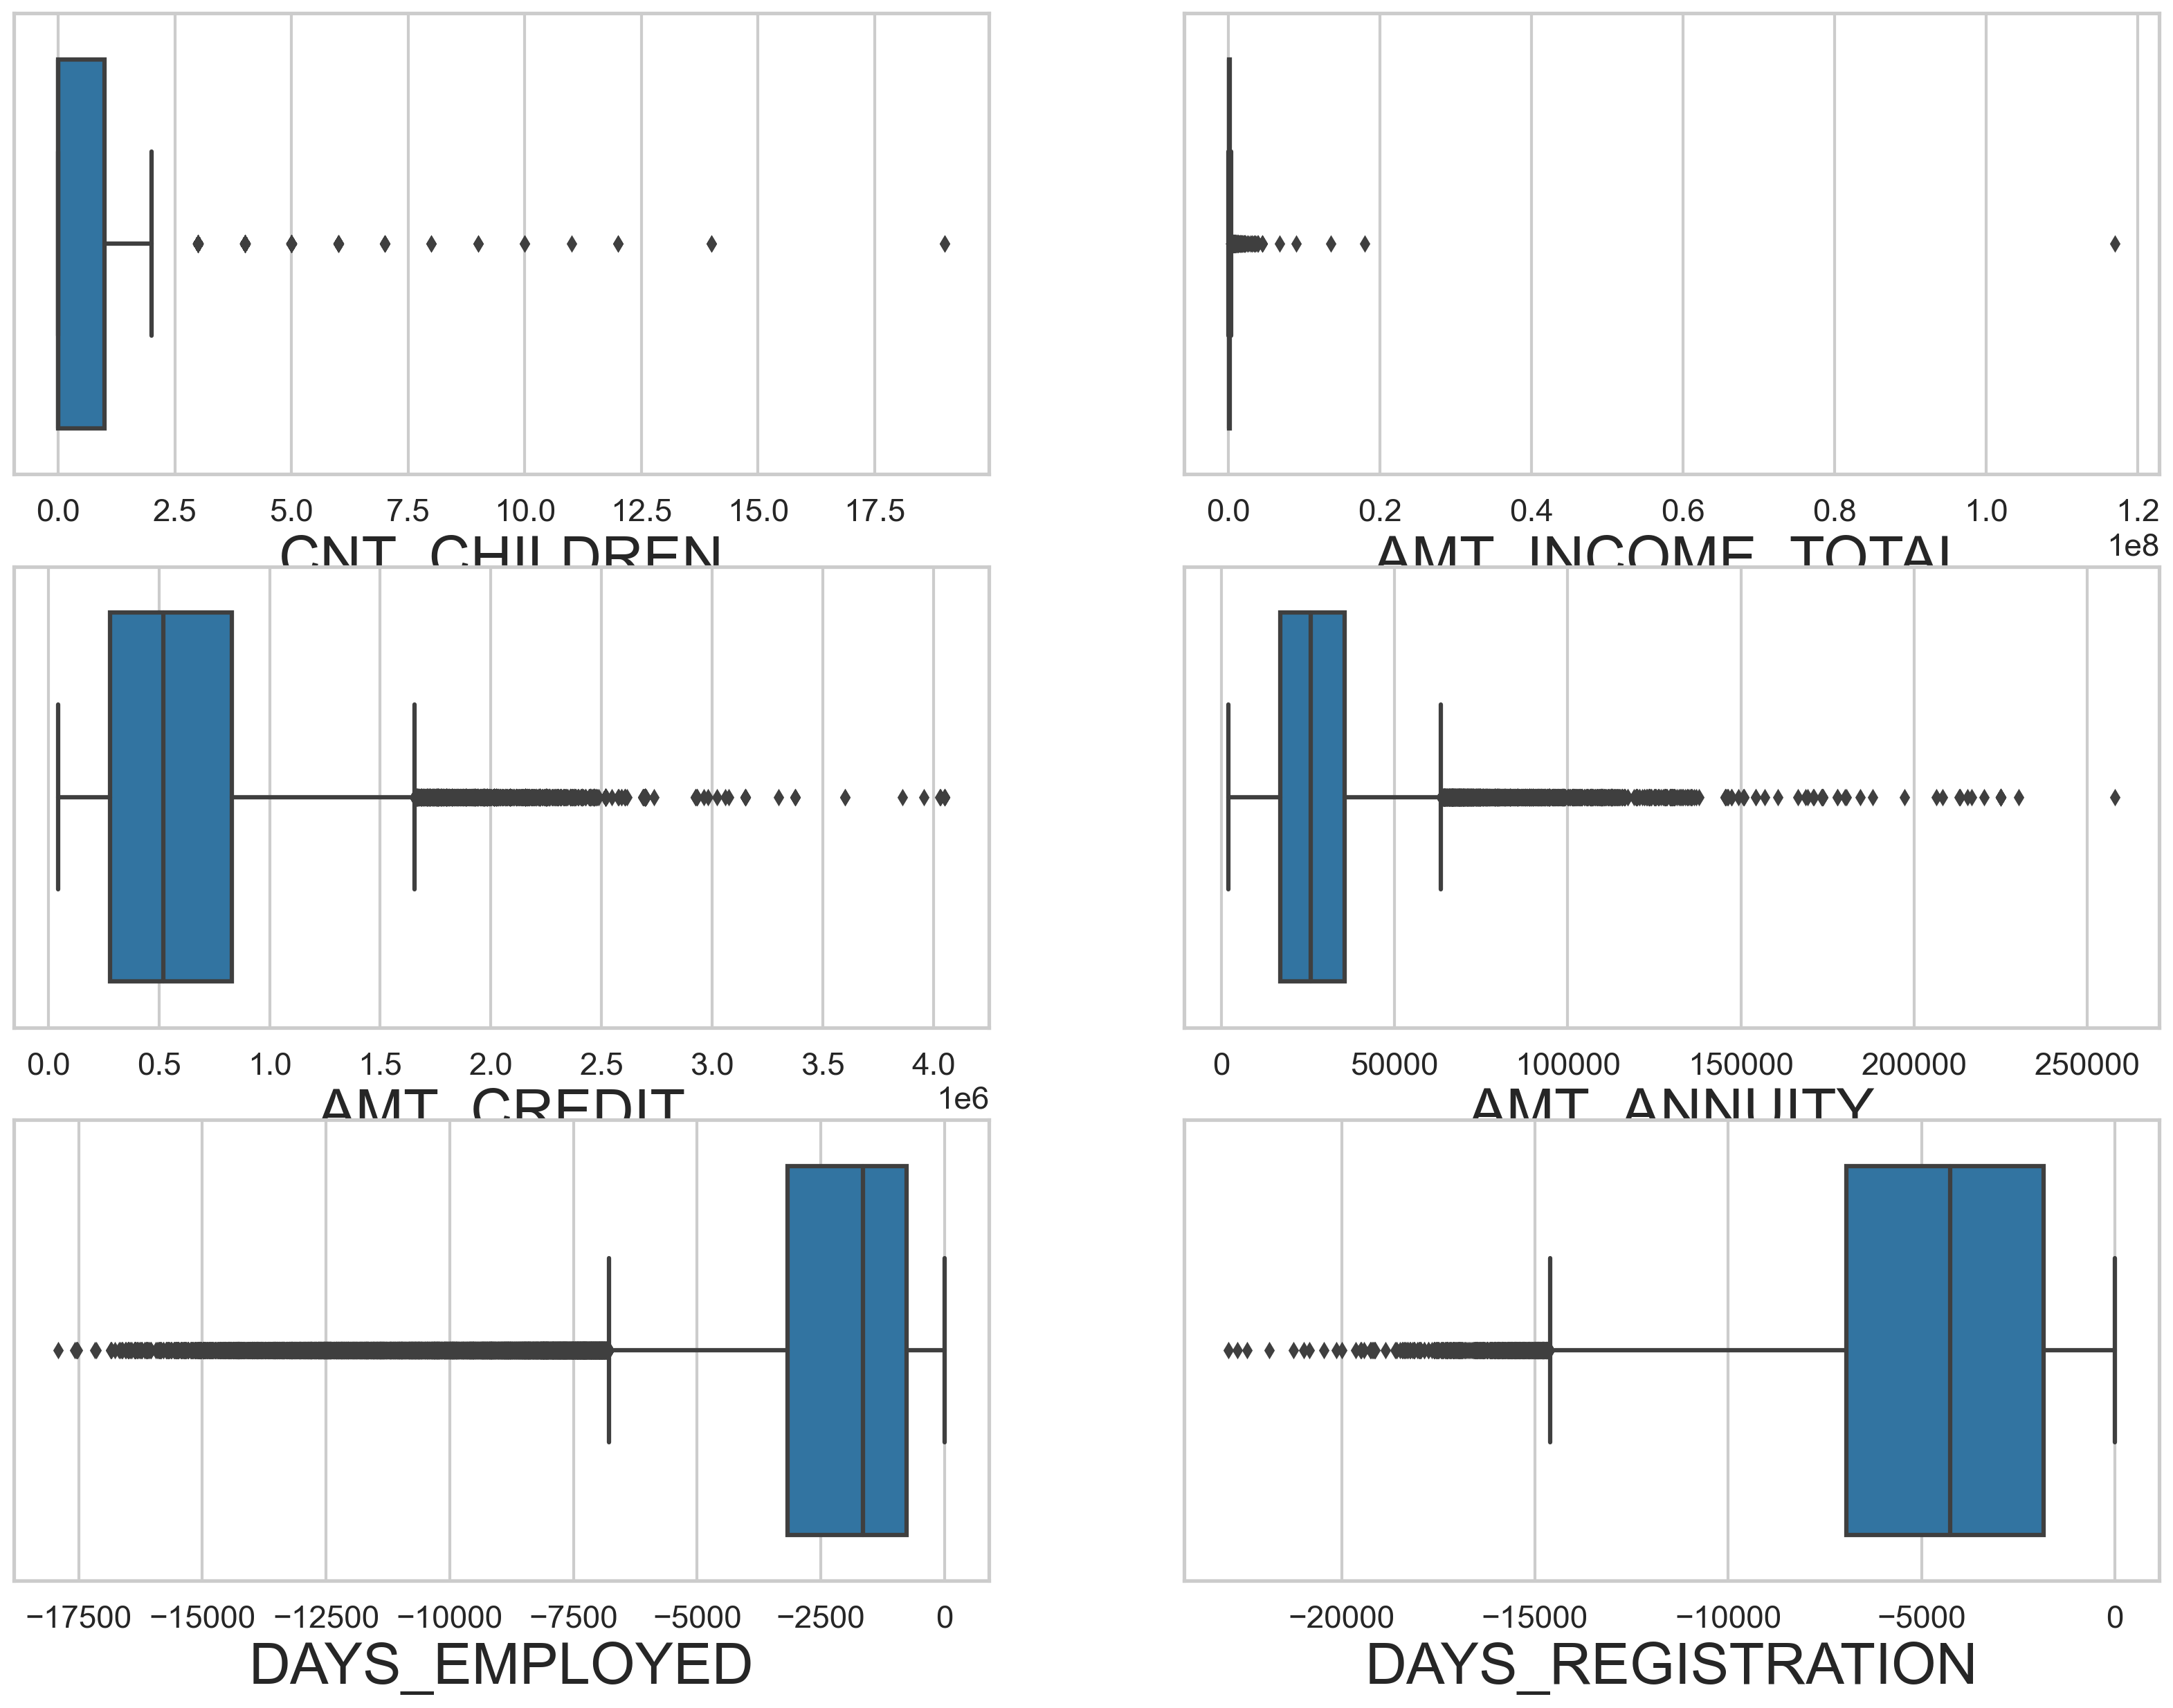

In [504]:
# Box plot for numerical  columns
features_0 = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','DAYS_EMPLOYED', 'DAYS_REGISTRATION']

plt.figure(figsize = (20, 15), dpi=200)
for i in enumerate(features_0):
    plt.subplot(3, 2, i[0]+1)
    sns.boxplot(x = i[1], data = inp_0)
plt.show()

In [505]:
inp_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252137 entries, 0 to 307510
Data columns (total 28 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   252137 non-null  int64  
 1   TARGET                       252137 non-null  int64  
 2   NAME_CONTRACT_TYPE           252137 non-null  object 
 3   CODE_GENDER                  252137 non-null  object 
 4   FLAG_OWN_CAR                 252137 non-null  object 
 5   FLAG_OWN_REALTY              252137 non-null  object 
 6   CNT_CHILDREN                 252137 non-null  int64  
 7   AMT_INCOME_TOTAL             252137 non-null  float64
 8   AMT_CREDIT                   252137 non-null  float64
 9   AMT_ANNUITY                  252137 non-null  float64
 10  NAME_INCOME_TYPE             252137 non-null  object 
 11  NAME_EDUCATION_TYPE          252137 non-null  object 
 12  NAME_FAMILY_STATUS           252137 non-null  object 
 13 

###### Matrix

In [506]:
#Lets Create bins for income amount

bins = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
slot = ['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']

inp_0['AMT_INCOME_RANGE']=pd.cut(inp_0['AMT_INCOME_TOTAL'],bins,labels=slot)

In [507]:
# Also Create bins for Credit amount

bins = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
slots = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']

inp_0['AMT_CREDIT_RANGE']=pd.cut(inp_0['AMT_CREDIT'],bins=bins,labels=slots)

In [508]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 28 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  NAME_INCOME_TYPE             307511 non-null  object 
 11  NAME_EDUCATION_TYPE          307511 non-null  object 
 12  NAME_FAMILY_STATUS           307511 non-null  object 
 13 

In [509]:
#Now lets Divide the dataset into two dataset of  target=1(client with payment difficulties) and target=0(all other)

target0=inp_0.loc[inp_0["TARGET"]==0]
target1=inp_0.loc[inp_0["TARGET"]==1]

In [510]:
target0.shape

(230302, 30)

In [511]:
target0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230302 entries, 1 to 307510
Data columns (total 30 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   230302 non-null  int64   
 1   TARGET                       230302 non-null  int64   
 2   NAME_CONTRACT_TYPE           230302 non-null  object  
 3   CODE_GENDER                  230302 non-null  object  
 4   FLAG_OWN_CAR                 230302 non-null  object  
 5   FLAG_OWN_REALTY              230302 non-null  object  
 6   CNT_CHILDREN                 230302 non-null  int64   
 7   AMT_INCOME_TOTAL             230302 non-null  float64 
 8   AMT_CREDIT                   230302 non-null  float64 
 9   AMT_ANNUITY                  230302 non-null  float64 
 10  NAME_INCOME_TYPE             230302 non-null  object  
 11  NAME_EDUCATION_TYPE          230302 non-null  object  
 12  NAME_FAMILY_STATUS           230302 non-null

In [512]:
target1.shape

(21835, 30)

In [513]:

percentage0= round(100*len(target1)/(len(target0)+len(target1)),2)

percentage1=round(100*len(target0)/(len(target0)+len(target1)),2)


print('Percentage of people who paid their loan are: ', percentage1, '%' )
print('Percentage of people who did not paid their loan are: ', percentage0, '%' )

Percentage of people who paid their loan are:  91.34 %
Percentage of people who did not paid their loan are:  8.66 %


In [514]:
#Here majority is for target 1 so lets calculating imbalance 
round(len(target0)/len(target1),2)

10.55

###### Univariate Analysis for target_0


In [591]:
def plotuni (inp_0,col,title,hue =None):
    plt.figure(figsize=[6,8])
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 30
    plt.rcParams['axes.titlesize'] = 40
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp1 = pd.Series(data = hue)
    fig, axplotuni = plt.subplots()
    width = len(inp_0[col].unique()) + 7 + 4*len(temp1.unique())
    fig.set_size_inches(width , 15)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    axplotuni = sns.countplot(data = inp_0, x= col, order=inp_0[col].value_counts().index,hue = hue,palette='magma') 
        
    plt.show()

In [517]:
target0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230302 entries, 1 to 307510
Data columns (total 30 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   230302 non-null  int64   
 1   TARGET                       230302 non-null  int64   
 2   NAME_CONTRACT_TYPE           230302 non-null  object  
 3   CODE_GENDER                  230302 non-null  object  
 4   FLAG_OWN_CAR                 230302 non-null  object  
 5   FLAG_OWN_REALTY              230302 non-null  object  
 6   CNT_CHILDREN                 230302 non-null  int64   
 7   AMT_INCOME_TOTAL             230302 non-null  float64 
 8   AMT_CREDIT                   230302 non-null  float64 
 9   AMT_ANNUITY                  230302 non-null  float64 
 10  NAME_INCOME_TYPE             230302 non-null  object  
 11  NAME_EDUCATION_TYPE          230302 non-null  object  
 12  NAME_FAMILY_STATUS           230302 non-null

<Figure size 432x576 with 0 Axes>

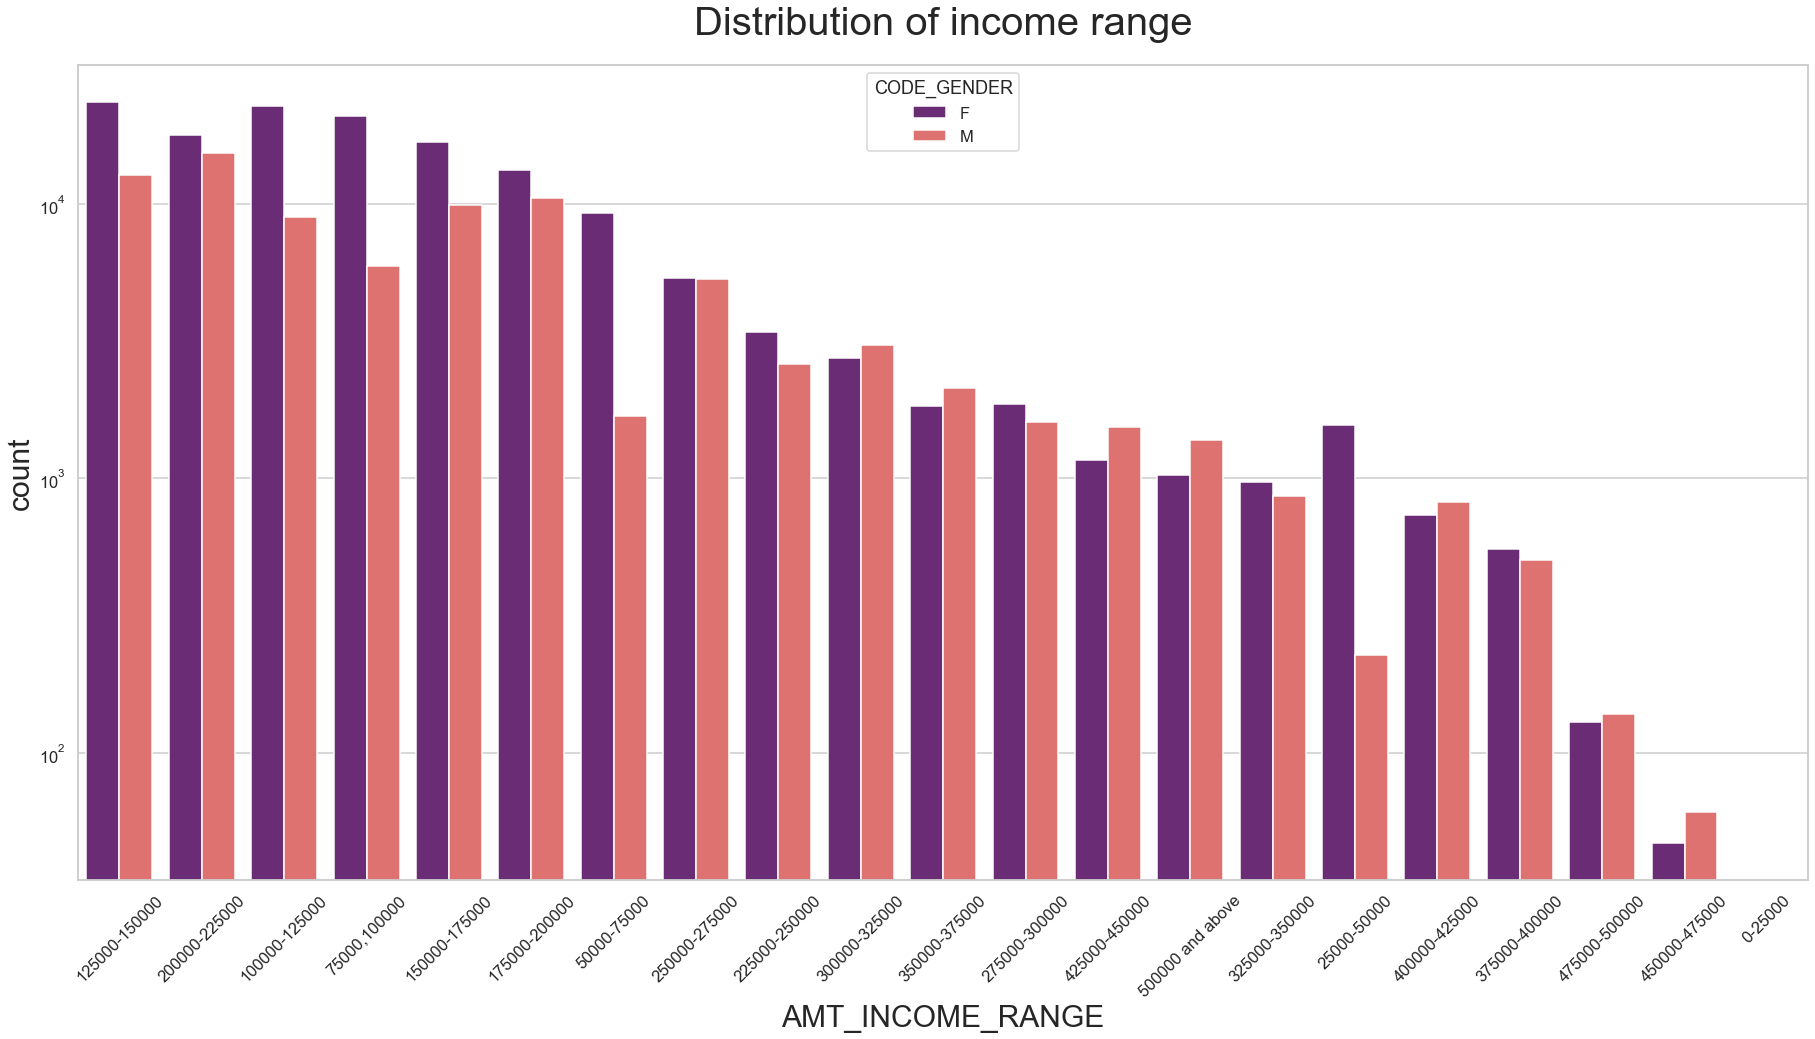

In [592]:
# Plot for income ranges

plotuni(target0,col='AMT_INCOME_RANGE',title='Distribution of income range',hue='CODE_GENDER')

From Above we can see that:
- 1) F means Female count is more than M Means Male 
- 2)range from 100000 to 200000 having more counts
- 3) There is mush less count for range >400000


<Figure size 432x576 with 0 Axes>

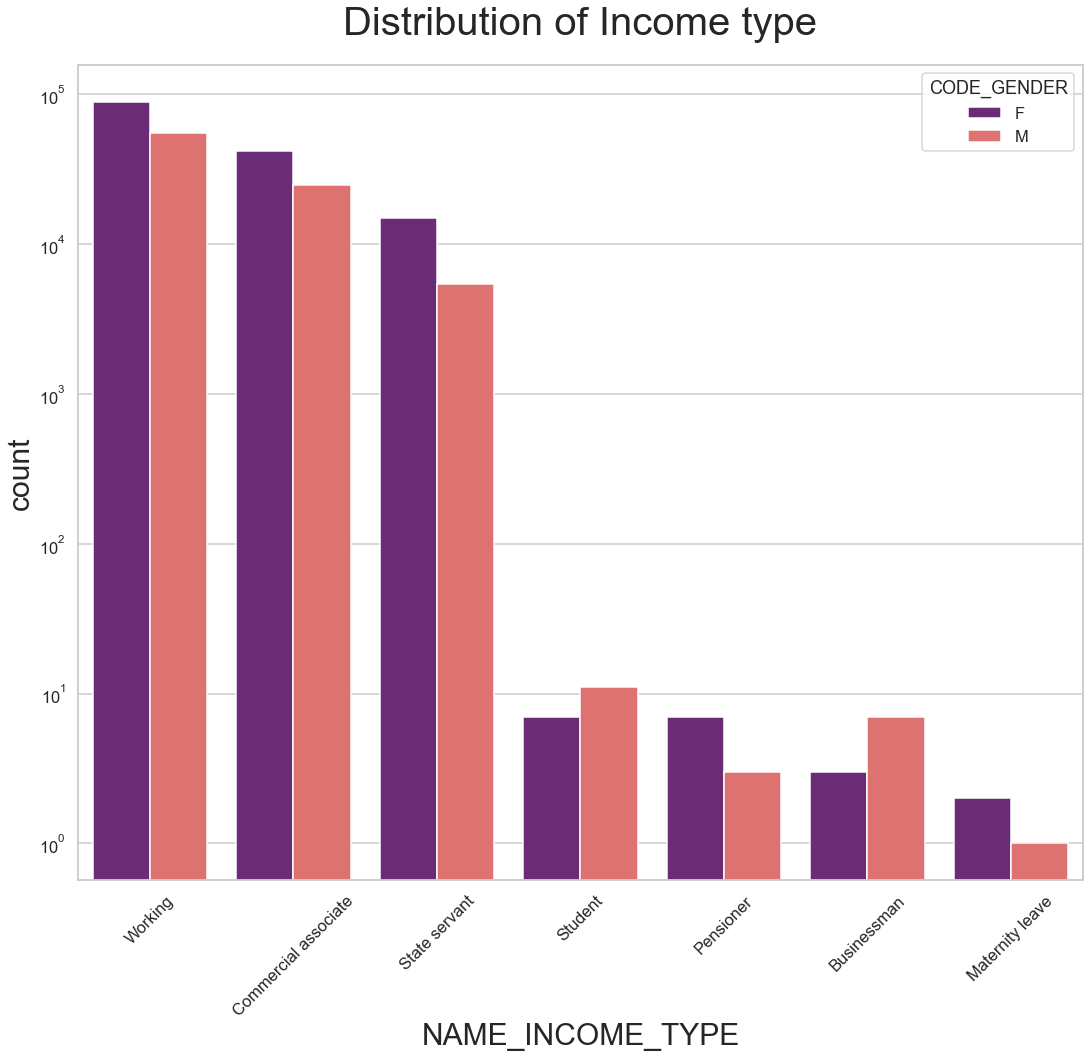

In [593]:
# Plot graph for Income type

plotuni(target0,col='NAME_INCOME_TYPE',title='Distribution of Income type',hue='CODE_GENDER')

In [520]:
target0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230302 entries, 1 to 307510
Data columns (total 30 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   230302 non-null  int64   
 1   TARGET                       230302 non-null  int64   
 2   NAME_CONTRACT_TYPE           230302 non-null  object  
 3   CODE_GENDER                  230302 non-null  object  
 4   FLAG_OWN_CAR                 230302 non-null  object  
 5   FLAG_OWN_REALTY              230302 non-null  object  
 6   CNT_CHILDREN                 230302 non-null  int64   
 7   AMT_INCOME_TOTAL             230302 non-null  float64 
 8   AMT_CREDIT                   230302 non-null  float64 
 9   AMT_ANNUITY                  230302 non-null  float64 
 10  NAME_INCOME_TYPE             230302 non-null  object  
 11  NAME_EDUCATION_TYPE          230302 non-null  object  
 12  NAME_FAMILY_STATUS           230302 non-null

From above graph we can conclude that:
- Working, commericial and stset servant have more credit count
- students , pensioner, business and maternity leave hav less credit count
- Also Female have more credit count compare to Male

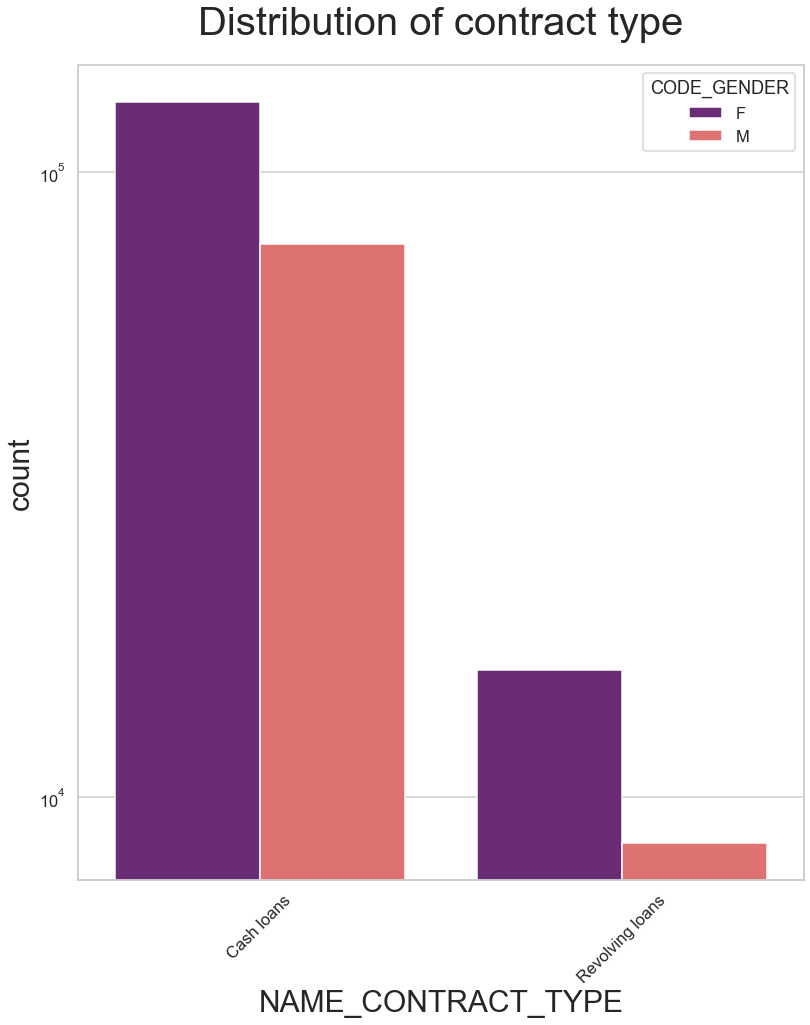

In [521]:
# Plot graph for Contract type

plotuni(target0,col='NAME_CONTRACT_TYPE',title='Distribution of contract type',hue='CODE_GENDER')

so base on above contract type graph :
- contract type Cash Loan have major creadit than Revolving Loan
- Here also Female is in lead for applying loans

<AxesSubplot:title={'center':'Orgazisation type Didtribution for target - 0'}, xlabel='count', ylabel='ORGANIZATION_TYPE'>

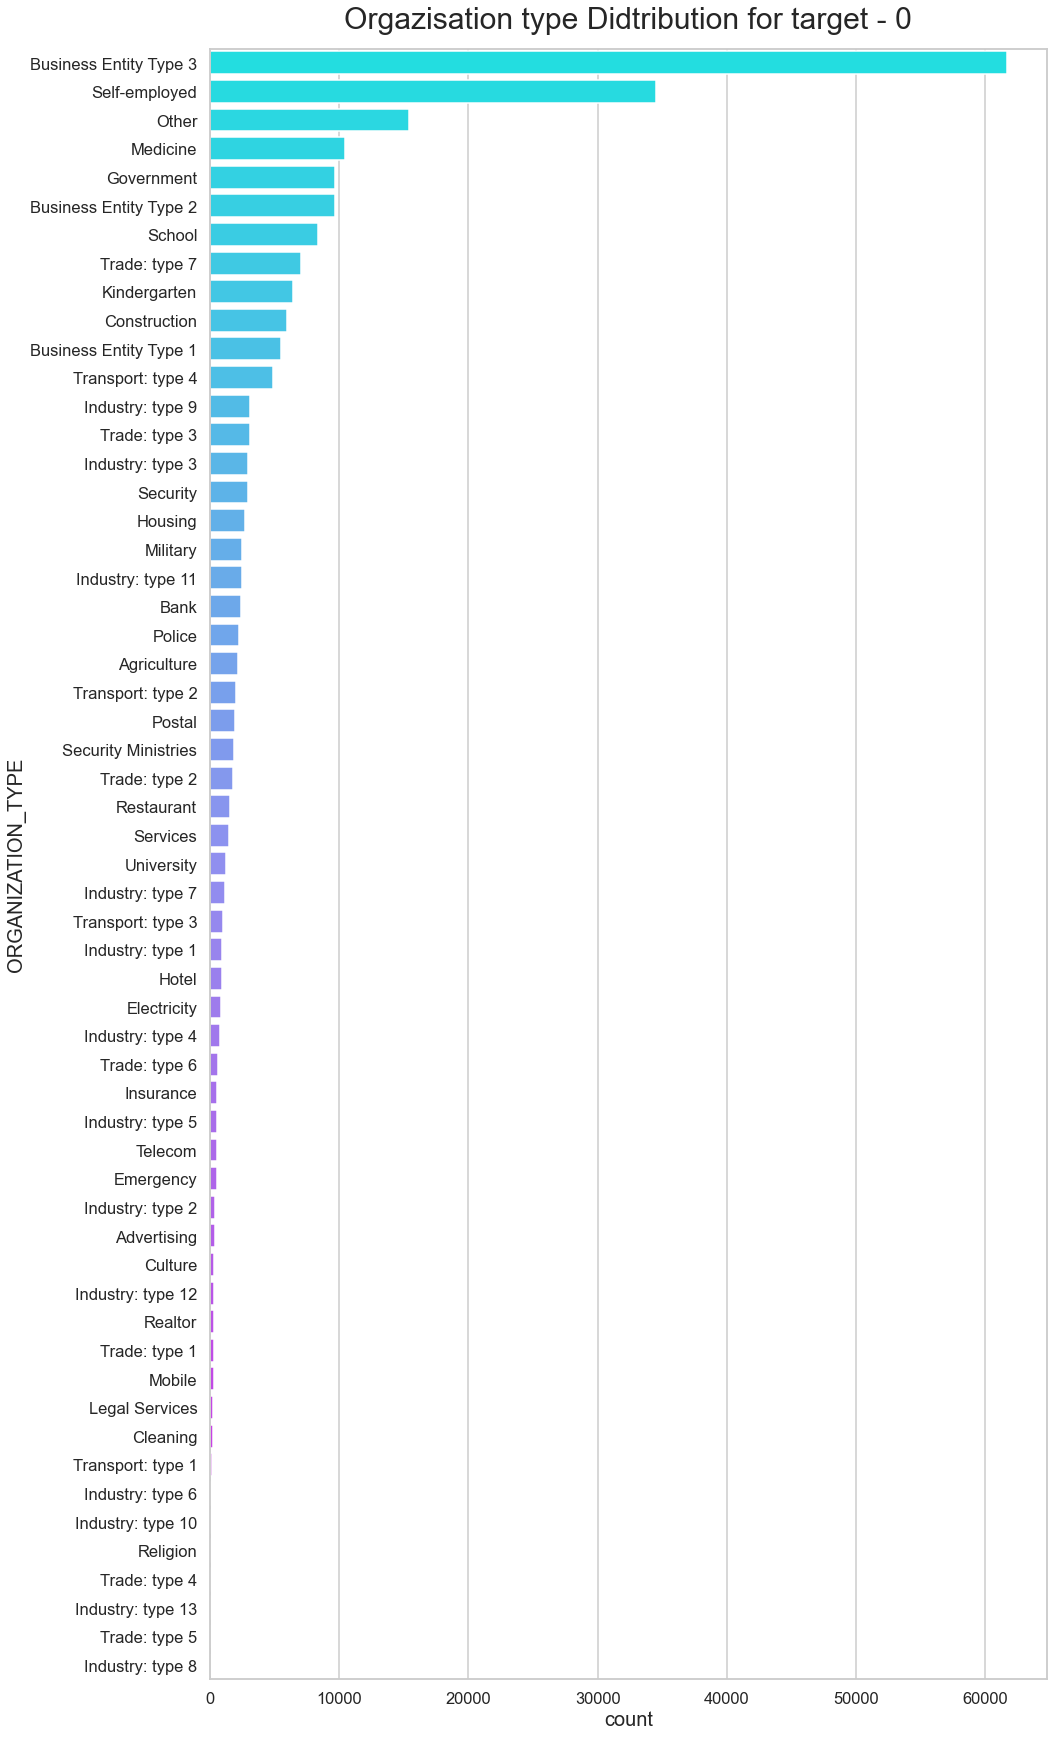

In [522]:
plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 30
plt.rcParams['axes.titlepad'] = 20
plt.title("Orgazisation type Didtribution for target - 0")

sns.countplot(data=target0,y='ORGANIZATION_TYPE',order=target0['ORGANIZATION_TYPE'].value_counts().index,palette='cool')


In [523]:
target0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230302 entries, 1 to 307510
Data columns (total 30 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   230302 non-null  int64   
 1   TARGET                       230302 non-null  int64   
 2   NAME_CONTRACT_TYPE           230302 non-null  object  
 3   CODE_GENDER                  230302 non-null  object  
 4   FLAG_OWN_CAR                 230302 non-null  object  
 5   FLAG_OWN_REALTY              230302 non-null  object  
 6   CNT_CHILDREN                 230302 non-null  int64   
 7   AMT_INCOME_TOTAL             230302 non-null  float64 
 8   AMT_CREDIT                   230302 non-null  float64 
 9   AMT_ANNUITY                  230302 non-null  float64 
 10  NAME_INCOME_TYPE             230302 non-null  object  
 11  NAME_EDUCATION_TYPE          230302 non-null  object  
 12  NAME_FAMILY_STATUS           230302 non-null

From above graph we caconclude that :
- Business, other ,medicine and self employees have majior count 

###### Categoroical Univariate Analysis for target=1(client with payment difficulties)

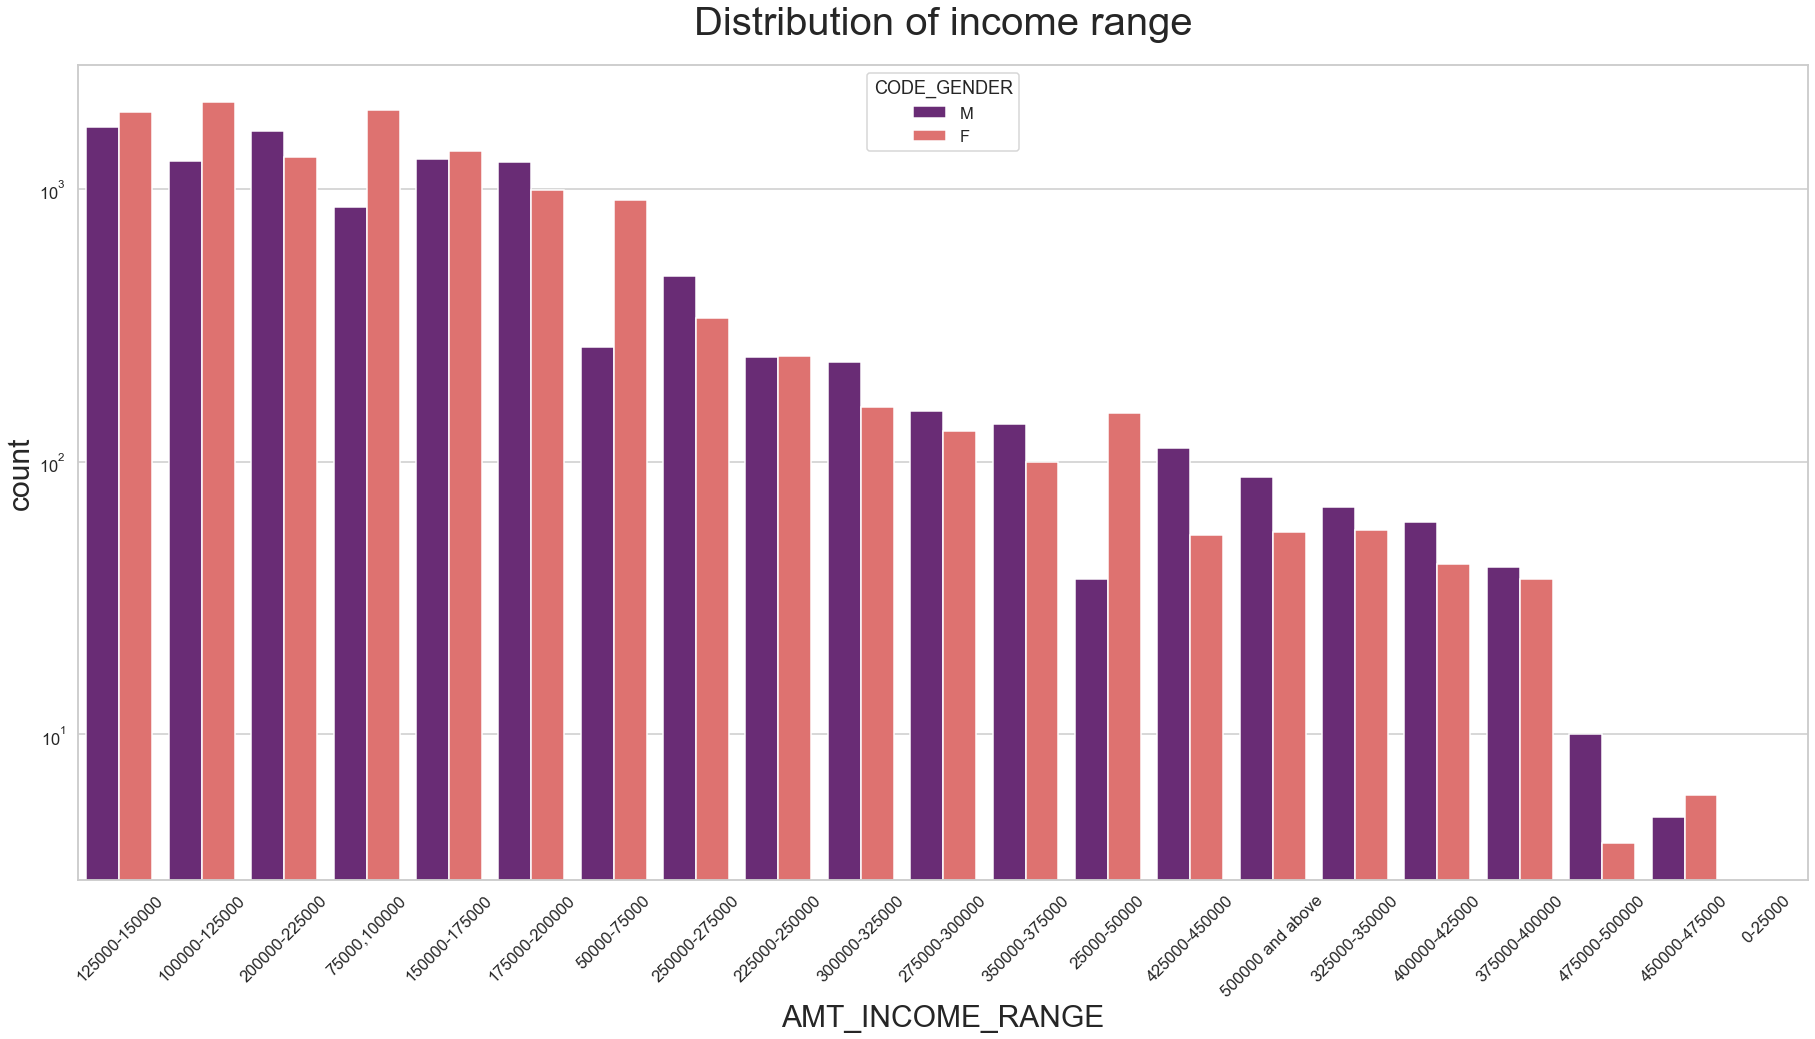

In [524]:
# PLot for income range

plotuni(target1,col='AMT_INCOME_RANGE',title='Distribution of income range',hue='CODE_GENDER')

from the above graph will conclude:

- Male count is higher than female count.
- Income range from 100000 to 200000 have major number of credits.
- there is very less count for income range > 400000 

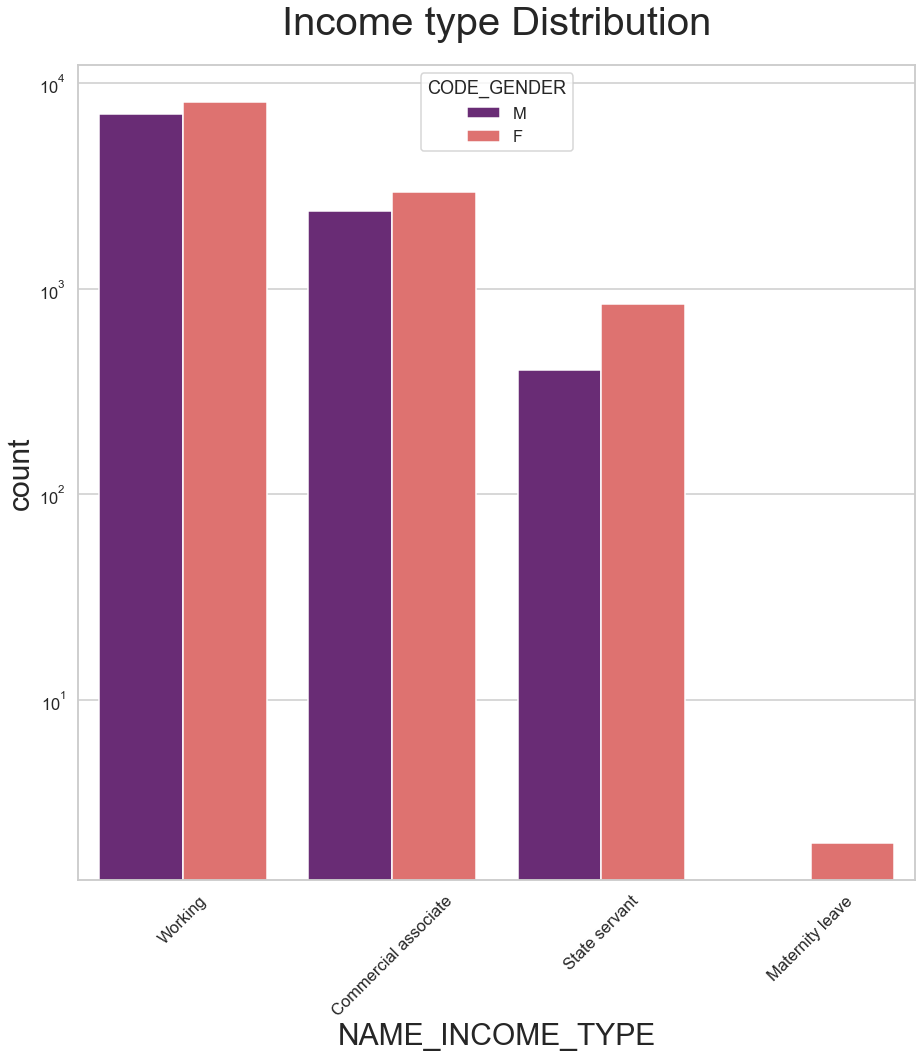

In [525]:
# Plot for Income type

plotuni(target1,col='NAME_INCOME_TYPE',title='Income type Distribution',hue='CODE_GENDER')


From this above graph will conclude that:
- Male have larger credits than female 
- working have majoir credit than any other and Maternity leave have much less credit

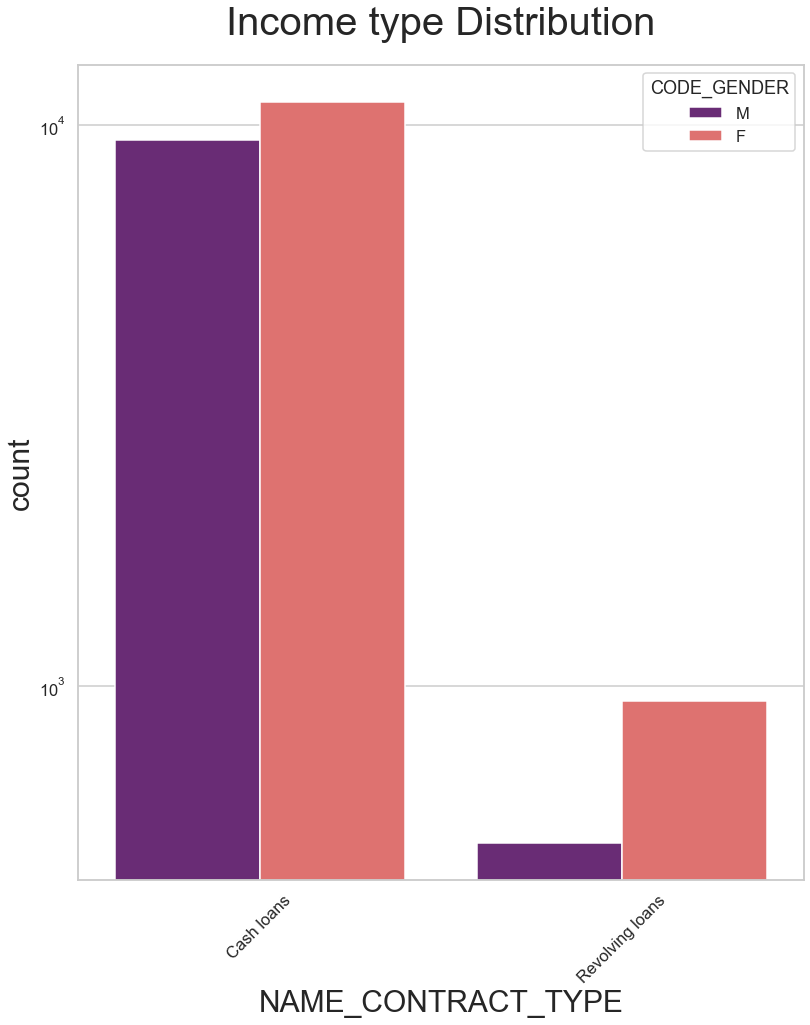

In [526]:
# Plot for Contract type

plotuni(target1,col='NAME_CONTRACT_TYPE',title='Income type Distribution',hue='CODE_GENDER')

From the above graph will conclude :

- For ‘cash loans’ is having higher number of credits than ‘Revolving loans’.
- For this also Female is leading.


<AxesSubplot:title={'center':'Organization type Distribution for target - 1'}, xlabel='count', ylabel='ORGANIZATION_TYPE'>

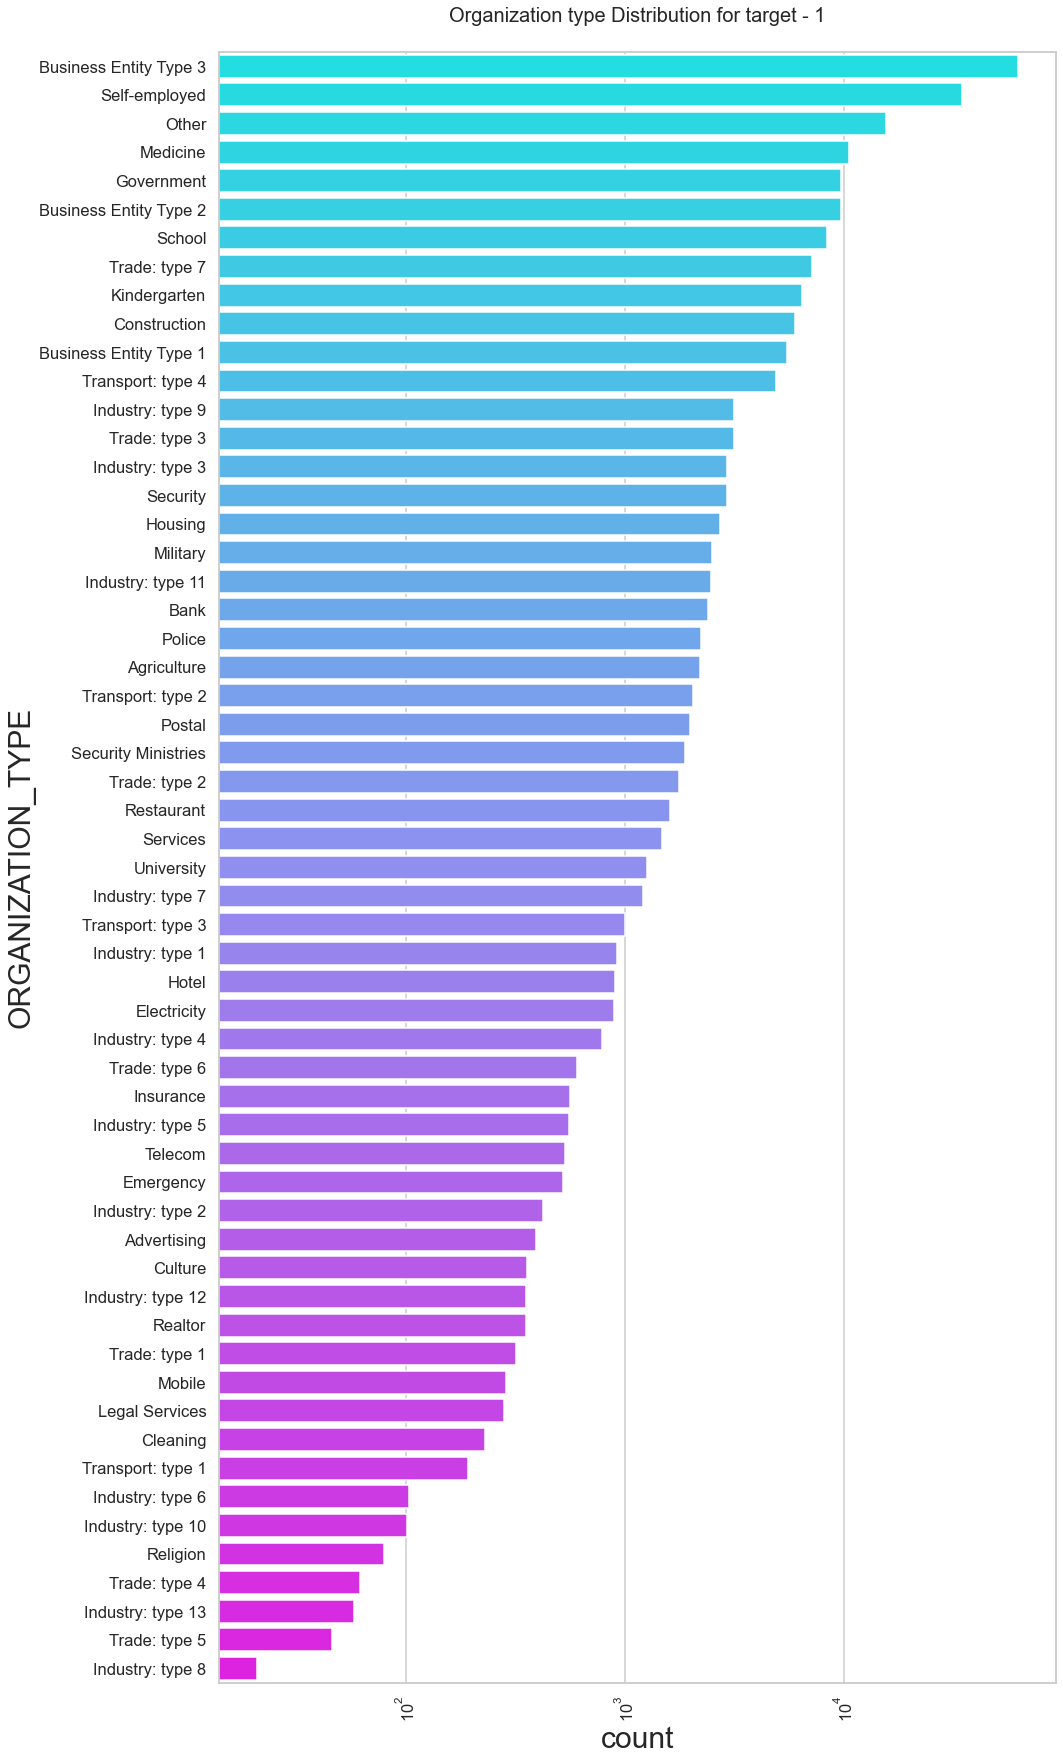

In [527]:
# Plot for Organization type

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 30
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.titlepad'] = 30

plt.title("Organization type Distribution for target - 1")

plt.xticks(rotation=90)
plt.xscale('log')

sns.countplot(data=target0,y='ORGANIZATION_TYPE',order=target0['ORGANIZATION_TYPE'].value_counts().index,palette='cool')


In [529]:
#Find correlation between numerical columns for both target 0 and 1 

target_corr0=target0.iloc[0:,2:]
target_corr1=target1.iloc[0:,2:]

df_target0=target_corr0.corr(method='spearman')
df_target1=target_corr1.corr(method='spearman')

In [530]:
df_target0

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
CNT_CHILDREN,1.000000,-0.021950,-0.023652,-0.010795,-0.030579,0.266534,0.030948,0.155518,-0.119164,-0.030162,-0.022813,-0.015475,-0.005576,0.002344,0.007487,0.013295
AMT_INCOME_TOTAL,-0.021950,1.000000,0.403876,0.472204,0.110074,-0.054666,-0.060868,0.040559,-0.036702,0.073503,0.077634,0.159962,0.148281,-0.001023,-0.013856,-0.004758
AMT_CREDIT,-0.023652,0.403876,1.000000,0.826689,0.060706,-0.169030,-0.104251,-0.015318,-0.038197,0.036923,0.015118,0.041693,0.045175,-0.040616,-0.037000,-0.011194
AMT_ANNUITY,-0.010795,0.472204,0.826689,1.000000,0.064328,-0.100287,-0.074643,0.010712,-0.027354,0.032953,0.033435,0.070841,0.069051,-0.019954,-0.024085,-0.008087
REGION_POPULATION_RELATIVE,-0.030579,0.110074,0.060706,0.064328,1.000000,-0.041663,0.000900,-0.042400,-0.010299,0.133213,-0.025292,0.032446,0.056814,-0.049779,-0.034808,-0.007332
DAYS_BIRTH,0.266534,-0.054666,-0.169030,-0.100287,-0.041663,1.000000,0.307787,0.265449,0.083331,0.051299,0.058627,0.038104,0.012789,0.167477,0.111539,0.029007
DAYS_EMPLOYED,0.030948,-0.060868,-0.104251,-0.074643,0.000900,0.307787,1.000000,0.126708,0.106823,0.026444,0.065435,0.086966,0.063533,0.118224,0.125954,0.069567
DAYS_REGISTRATION,0.155518,0.040559,-0.015318,0.010712,-0.042400,0.265449,0.126708,1.000000,0.036788,-0.029553,0.017715,0.015092,0.007716,0.038064,0.047339,0.027231
DAYS_ID_PUBLISH,-0.119164,-0.036702,-0.038197,-0.027354,-0.010299,0.083331,0.106823,0.036788,1.000000,0.008538,0.027302,0.020823,0.008525,0.054875,0.033427,0.001476
HOUR_APPR_PROCESS_START,-0.030162,0.073503,0.036923,0.032953,0.133213,0.051299,0.026444,-0.029553,0.008538,1.000000,0.051744,0.067352,0.053813,0.011287,-0.005971,-0.010720


In [531]:
df_target1

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
CNT_CHILDREN,1.000000,-0.039123,0.000427,0.015133,-0.029682,0.175025,0.006823,0.110854,-0.091042,-0.040338,-0.035213,-0.040853,-0.027993,-0.016072,-0.005444,0.009557
AMT_INCOME_TOTAL,-0.039123,1.000000,0.364559,0.428947,0.058005,-0.103026,-0.053798,0.011378,-0.051113,0.078779,0.075615,0.156374,0.145982,-0.003813,-0.006241,0.004230
AMT_CREDIT,0.000427,0.364559,1.000000,0.812093,0.043545,-0.200718,-0.107605,-0.021973,-0.065143,0.024616,0.015043,0.032536,0.034861,-0.030974,-0.032882,-0.012465
AMT_ANNUITY,0.015133,0.428947,0.812093,1.000000,0.028666,-0.100200,-0.060193,0.019762,-0.044128,0.021129,0.029646,0.060363,0.059724,-0.011744,-0.015938,-0.003012
REGION_POPULATION_RELATIVE,-0.029682,0.058005,0.043545,0.028666,1.000000,-0.044444,-0.015246,-0.033490,-0.017779,0.109400,-0.032702,-0.008160,0.012602,-0.057239,-0.044761,-0.014753
DAYS_BIRTH,0.175025,-0.103026,-0.200718,-0.100200,-0.044444,1.000000,0.256870,0.192350,0.146246,0.041994,0.046320,0.022208,0.000356,0.145884,0.096181,0.009633
DAYS_EMPLOYED,0.006823,-0.053798,-0.107605,-0.060193,-0.015246,0.256870,1.000000,0.086286,0.104244,0.010328,0.069566,0.082264,0.056081,0.118869,0.139863,0.069316
DAYS_REGISTRATION,0.110854,0.011378,-0.021973,0.019762,-0.033490,0.192350,0.086286,1.000000,0.061563,-0.044753,0.006362,0.000896,-0.001416,0.015831,0.039204,0.026105
DAYS_ID_PUBLISH,-0.091042,-0.051113,-0.065143,-0.044128,-0.017779,0.146246,0.104244,0.061563,1.000000,0.012709,0.024860,0.013162,0.002567,0.048184,0.015838,-0.015598
HOUR_APPR_PROCESS_START,-0.040338,0.078779,0.024616,0.021129,0.109400,0.041994,0.010328,-0.044753,0.012709,1.000000,0.050953,0.063877,0.050300,0.003947,0.004775,0.002319


In [533]:
#Lets plot above correlation with heat map 

def corr_targets(data,title):
    plt.figure(figsize=(15, 10))
    plt.rcParams['axes.titlesize'] = 35
    plt.rcParams['axes.titlepad'] = 70


    sns.heatmap(data,annot=False)

    plt.title(title)
    plt.yticks(rotation=0)
    plt.show()

In [532]:
target0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230302 entries, 1 to 307510
Data columns (total 30 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   230302 non-null  int64   
 1   TARGET                       230302 non-null  int64   
 2   NAME_CONTRACT_TYPE           230302 non-null  object  
 3   CODE_GENDER                  230302 non-null  object  
 4   FLAG_OWN_CAR                 230302 non-null  object  
 5   FLAG_OWN_REALTY              230302 non-null  object  
 6   CNT_CHILDREN                 230302 non-null  int64   
 7   AMT_INCOME_TOTAL             230302 non-null  float64 
 8   AMT_CREDIT                   230302 non-null  float64 
 9   AMT_ANNUITY                  230302 non-null  float64 
 10  NAME_INCOME_TYPE             230302 non-null  object  
 11  NAME_EDUCATION_TYPE          230302 non-null  object  
 12  NAME_FAMILY_STATUS           230302 non-null

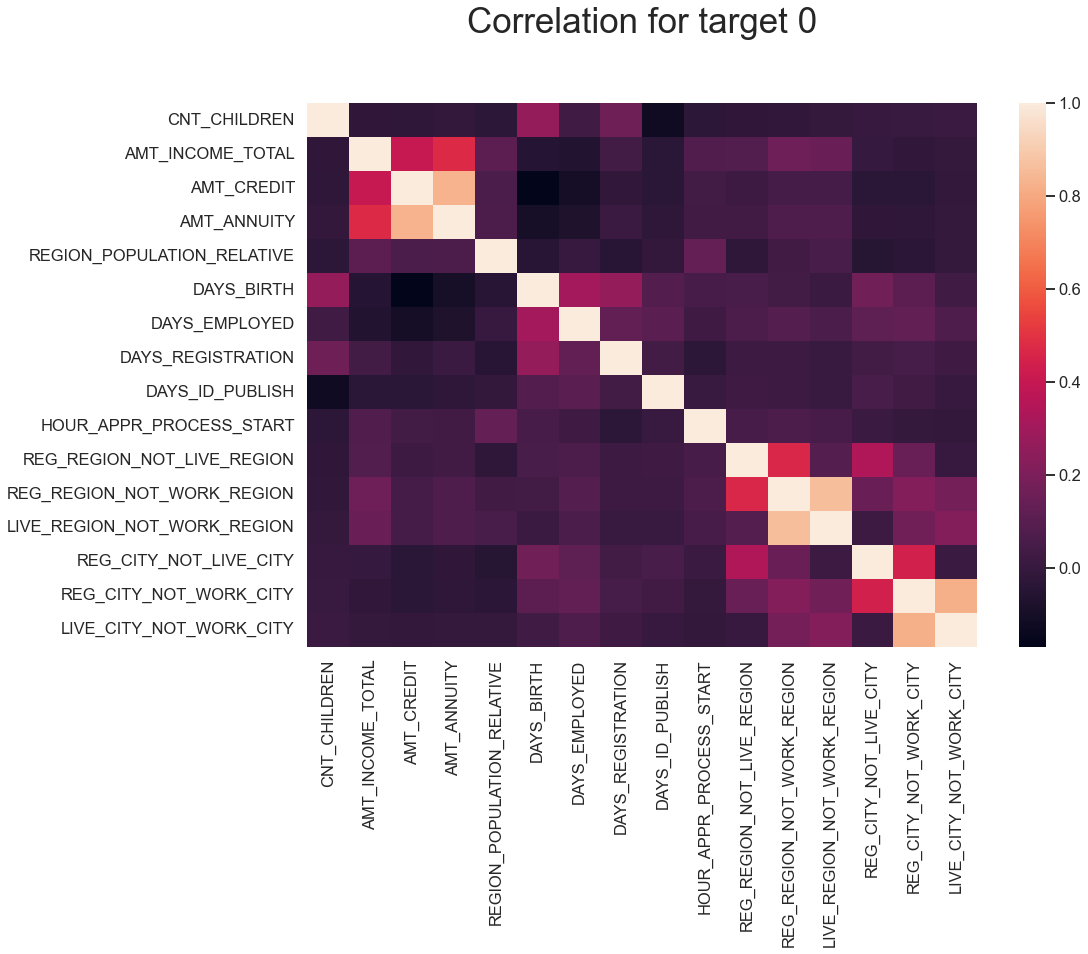

In [534]:

# Target 0

corr_targets(data=df_target0,title='Correlation for target 0')

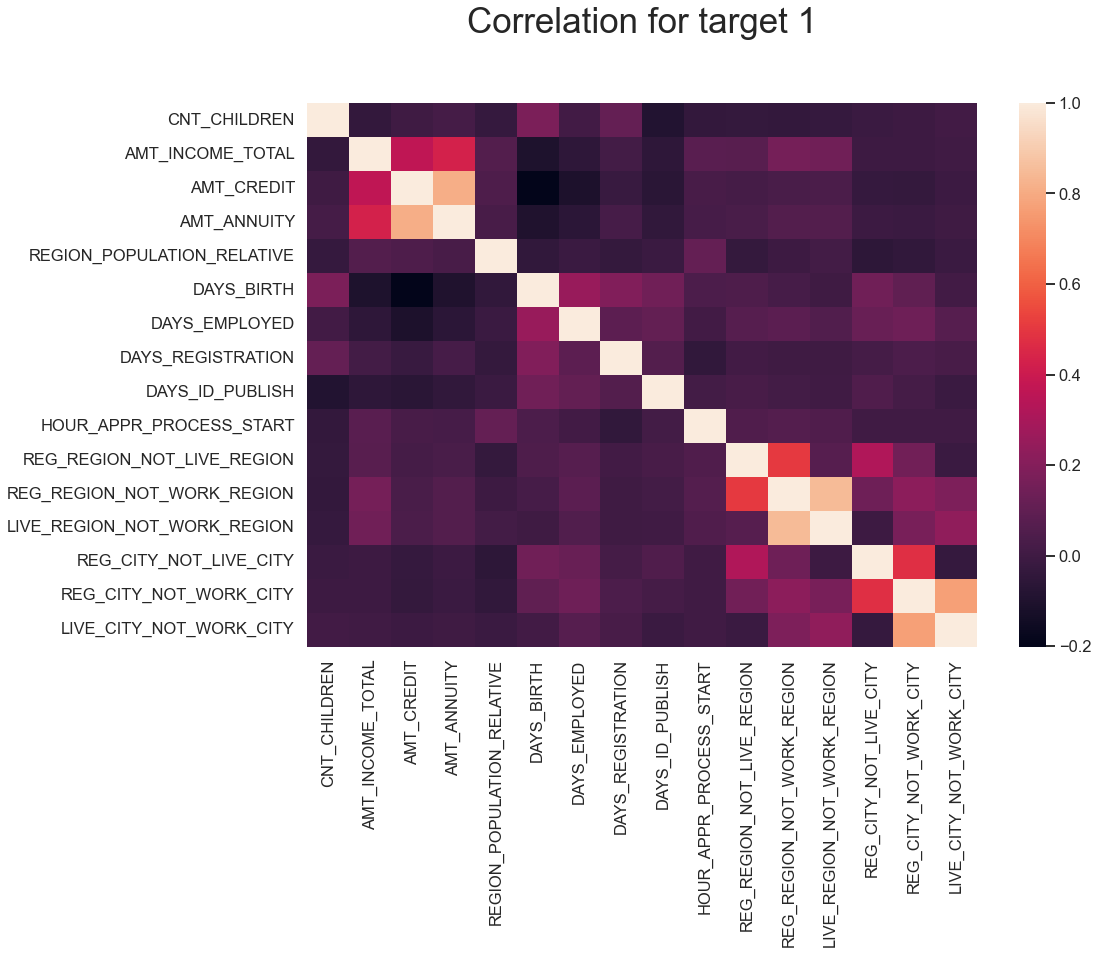

In [535]:
#Target 1

corr_targets(data=df_target1,title='Correlation for target 1')

For Target 1 , having quite a same observation just like Target 0,but with few difference. such as 

- The client's permanent address does not match contact address are having less children and vice-versa
- the client's permanent address does not match work address are having less children and vice-versa

###### Univariate analysis for variables

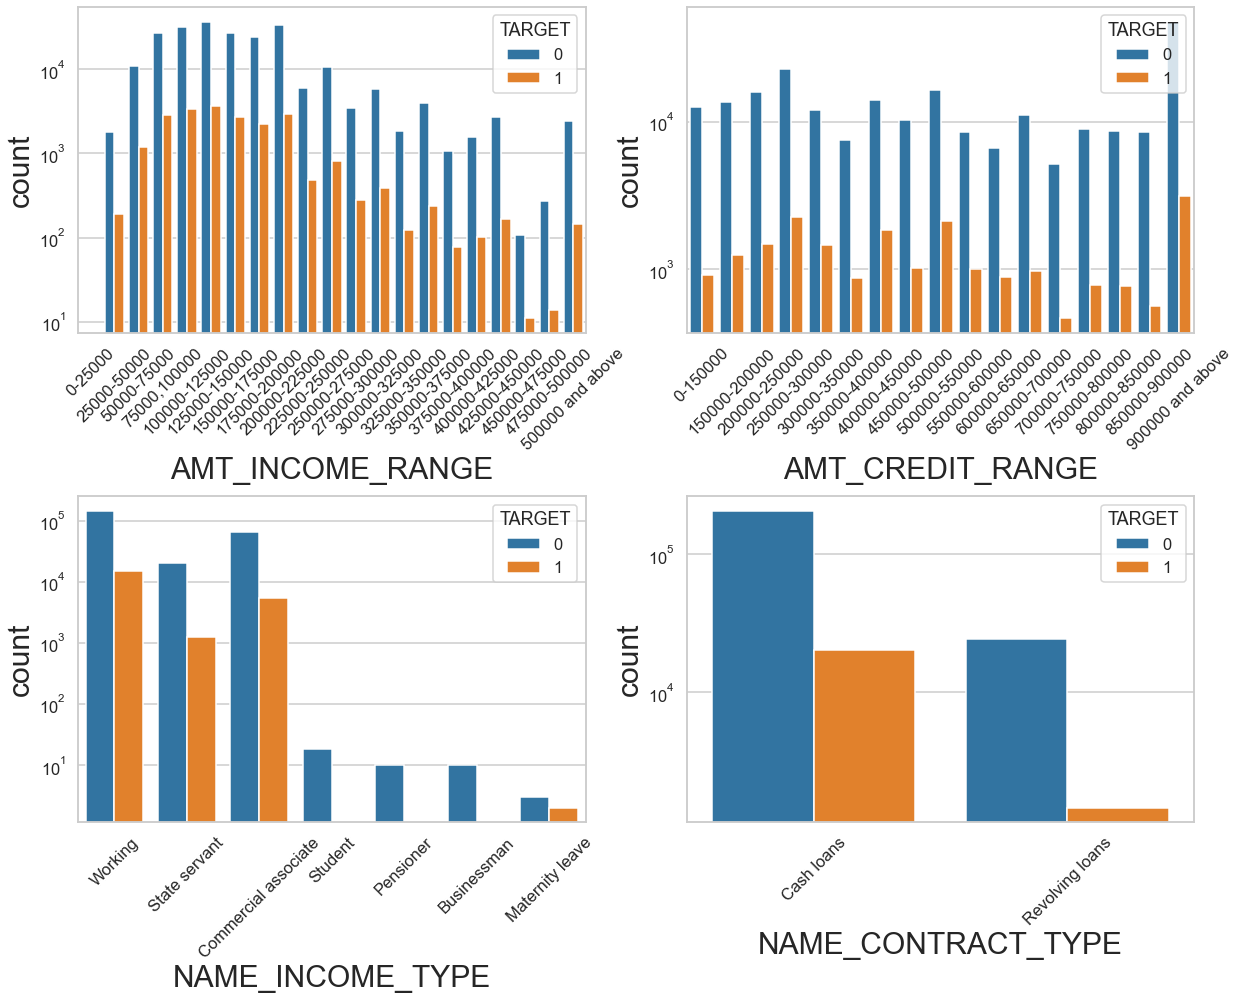

In [536]:
# Categoroical variable Univariate Analysis for target 0  and target 1

features = ['AMT_INCOME_RANGE', 'AMT_CREDIT_RANGE','NAME_INCOME_TYPE','NAME_CONTRACT_TYPE']
plt.figure(figsize = (20, 15))

for plt1 in enumerate(features):
    plt.subplot(2, 2, plt1[0]+1)
    plt.subplots_adjust(hspace=0.5)
    sns.countplot(x = plt1[1], hue = 'TARGET', data = inp_0)
    
    plt.rcParams['axes.titlesize'] = 16
    
    plt.xticks(rotation = 45)
    plt.yscale('log')

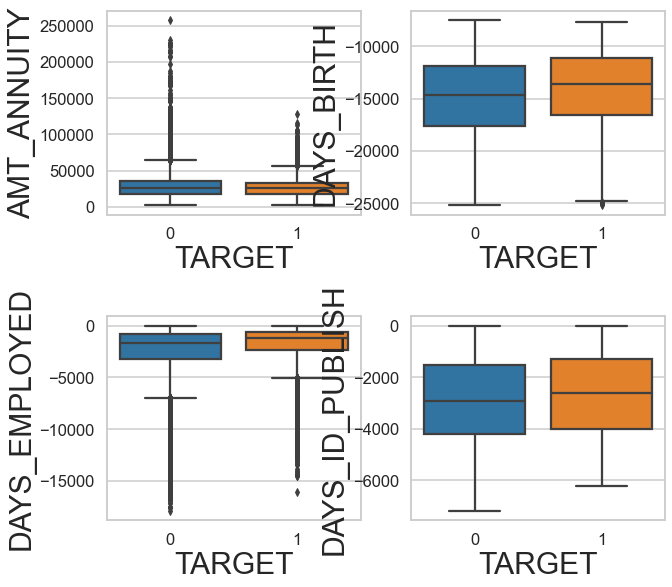

In [537]:
# continous variabl Univariate Analysis for target 0  and target 1 

features_continous = ['AMT_ANNUITY','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_ID_PUBLISH']
plt.figure(figsize = (10, 15))

for plt1 in enumerate(features_continous):
    plt.subplot(3, 2, plt1[0]+1)
    plt.subplots_adjust(hspace=0.5)
    sns.boxplot(x = 'TARGET', y = plt1[1], data = inp_0)

###### Lets do Bivariate Analysis for Target 0

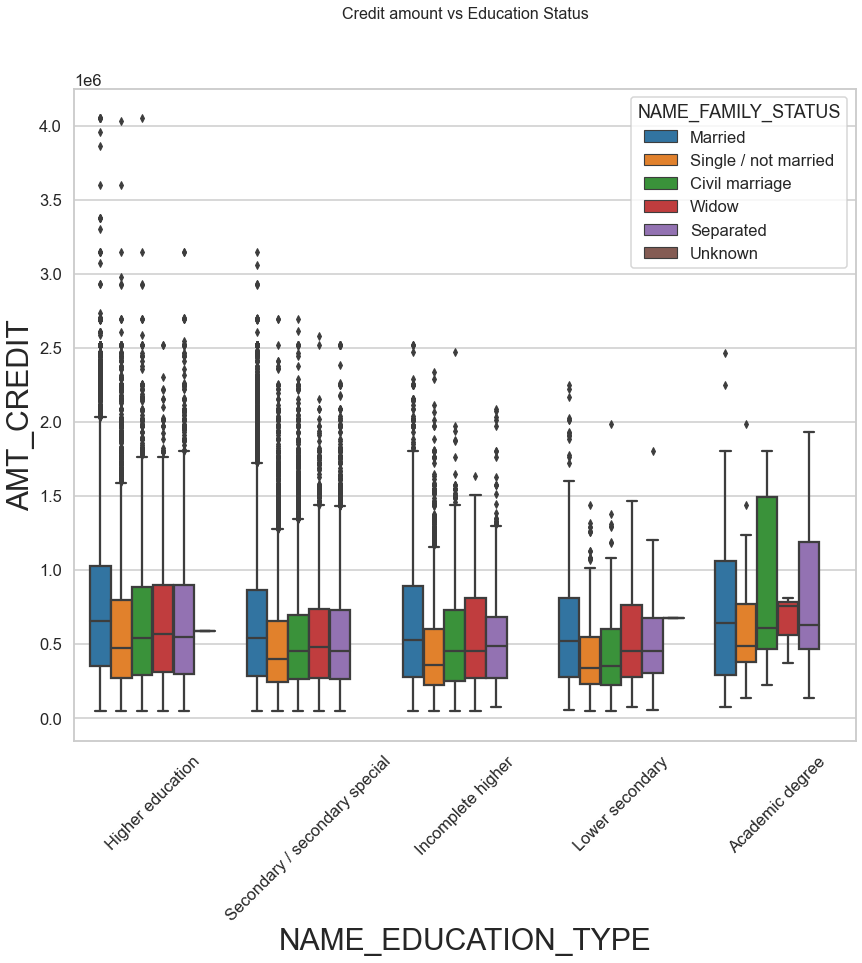

In [541]:
# for credit Amount
plt.figure(figsize=(14,12))
plt.xticks(rotation=45)
sns.boxplot(data =target0, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit amount vs Education Status')
plt.show()

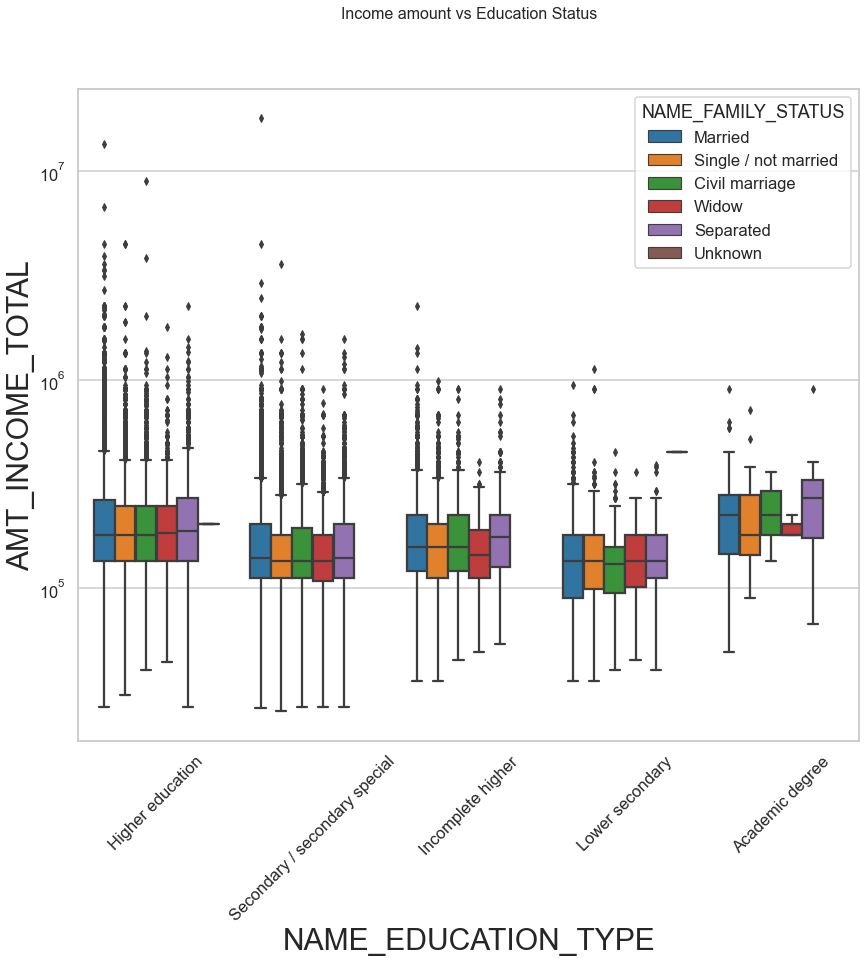

In [540]:
#AMT_INCOME_TOTAL vs  
plt.figure(figsize=(14,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =target0, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status')
plt.show()

###### Lets do Bivariate for Target 1

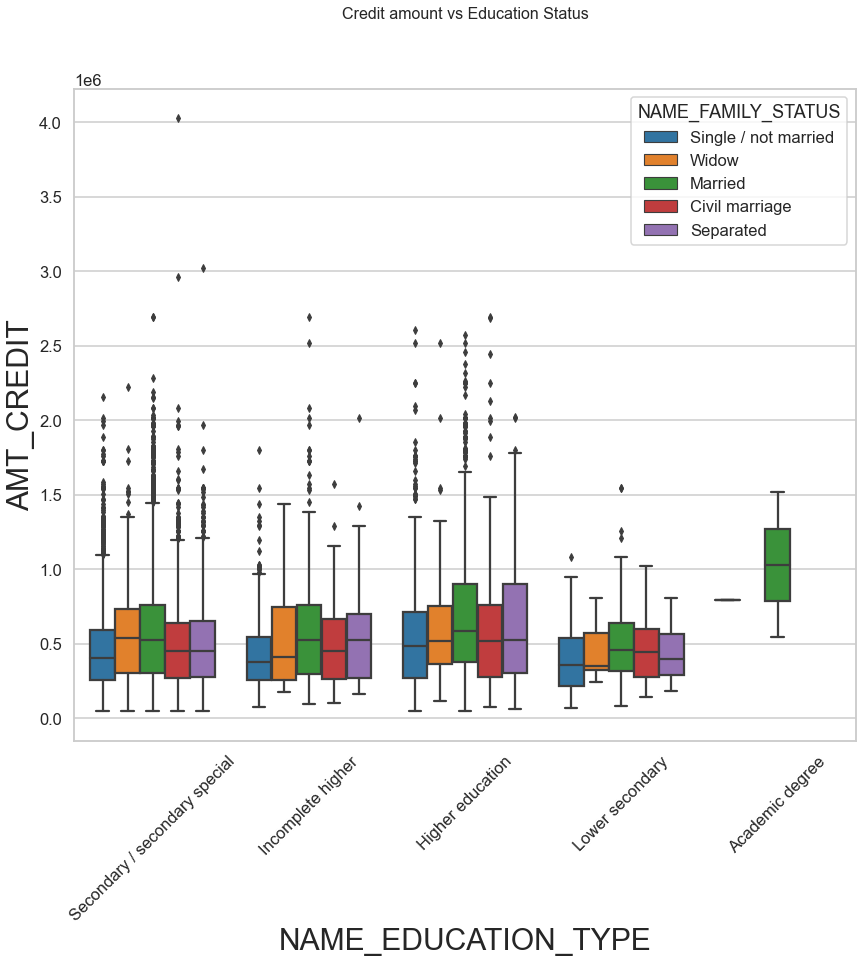

In [550]:
# for credit Amount
plt.figure(figsize=(14,12))
plt.xticks(rotation=45)
sns.boxplot(data =target1, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit amount vs Education Status')
plt.show()

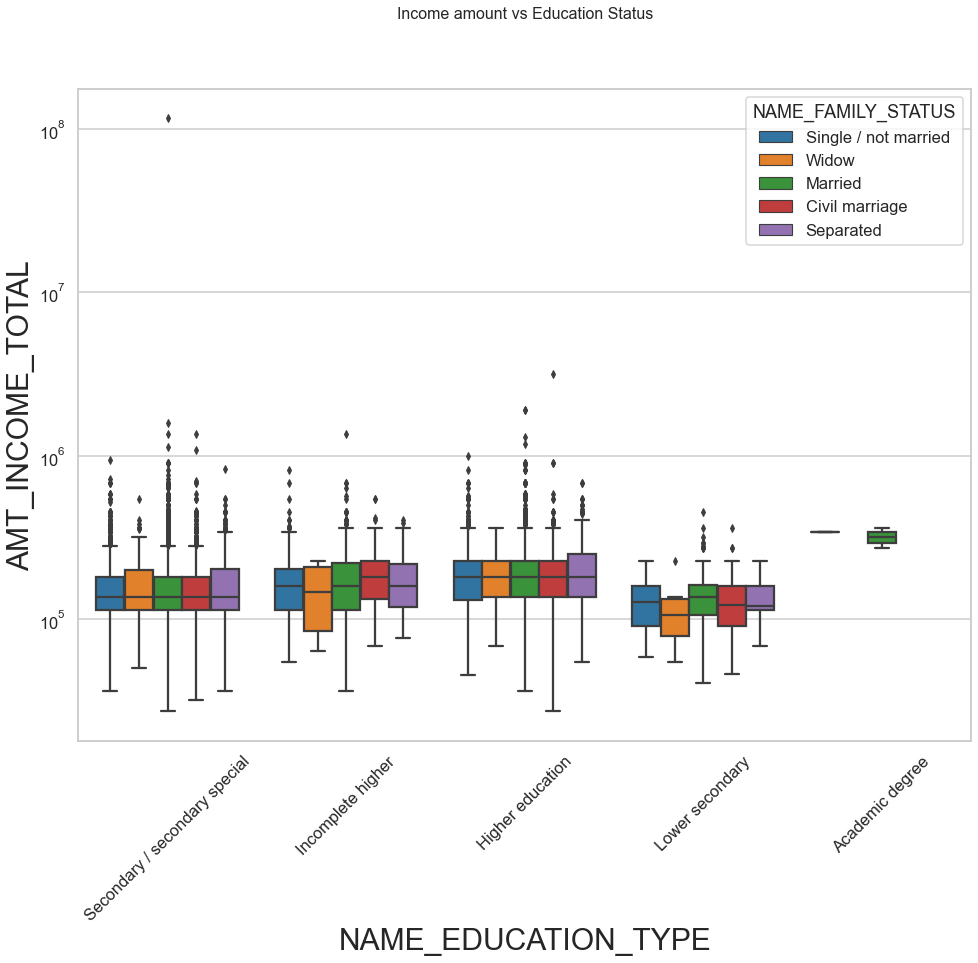

In [551]:

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =target1, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status')
plt.show()

### Now Read inp1 dataframe of previous data

In [554]:
inp1.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [556]:
inp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [557]:
inp1.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [558]:
inp1.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

##### Clearing Missing values 

In [559]:
# number of null values columns having more than 30%

null_col=inp1.isnull().sum()
null_col=null_col[null_col.values>(0.3*len(null_col))]
len(null_col)

15

In [561]:
#Lets drop those columns

null_col = list(null_col[null_col.values>=0.3].index)
inp1.drop(labels=null_col,axis=1,inplace=True)

inp1.shape

(1670214, 22)

In [562]:
# lets remove XNA values from columns same as application dataset

inp1=inp1.drop(inp1[inp1['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
inp1=inp1.drop(inp1[inp1['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
inp1=inp1.drop(inp1[inp1['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)


In [563]:
inp1.shape

(69635, 22)

In [564]:
inp1.isnull().sum()

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_APPLICATION                0
AMT_CREDIT                     0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
FLAG_LAST_APPL_PER_CONTRACT    0
NFLAG_LAST_APPL_IN_DAY         0
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_SELLER_INDUSTRY           0
NAME_YIELD_GROUP               0
dtype: int64

#### Most imp steps , Lets merge application data sets  and previous datset

In [565]:
# Now merging the Application dataset with previous appliaction dataset

app_pre=pd.merge(left=inp0,right=inp1,how='inner',on='SK_ID_CURR',suffixes='_x')

In [567]:
app_pre.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_,AMT_ANNUITY,...,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP
0,100034,0,Revolving loans,M,N,Y,0,90000.0,180000.0,9000.0,...,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high
1,100035,0,Cash loans,F,N,Y,0,292500.0,665892.0,24592.5,...,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_action
2,100039,0,Cash loans,M,Y,N,1,360000.0,733315.5,39069.0,...,Cash through the bank,XAP,Refreshed,XNA,Cash,walk-in,Channel of corporate sales,-1,XNA,low_normal
3,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,...,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_normal
4,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,...,Cash through the bank,LIMIT,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_normal


In [570]:
app_pre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59413 entries, 0 to 59412
Data columns (total 49 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SK_ID_CURR                   59413 non-null  int64  
 1   TARGET                       59413 non-null  int64  
 2   NAME_CONTRACT_TYPE_          59413 non-null  object 
 3   CODE_GENDER                  59413 non-null  object 
 4   FLAG_OWN_CAR                 59413 non-null  object 
 5   FLAG_OWN_REALTY              59413 non-null  object 
 6   CNT_CHILDREN                 59413 non-null  int64  
 7   AMT_INCOME_TOTAL             59413 non-null  float64
 8   AMT_CREDIT_                  59413 non-null  float64
 9   AMT_ANNUITY                  59413 non-null  float64
 10  NAME_INCOME_TYPE             59413 non-null  object 
 11  NAME_EDUCATION_TYPE          59413 non-null  object 
 12  NAME_FAMILY_STATUS           59413 non-null  object 
 13  NAME_HOUSING_TYP

In [571]:
#Lets rename few important columns
app_pre = app_pre.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE',
                         'AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START',
                         'NAME_CONTRACT_TYPEx':'PREV_NAME_CONTRACT_TYPE',# change
                         'AMT_CREDITx':'PREV_AMT_CREDIT','AMT_ANNUITYx':'PREV_AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_STARTx':'PREV_WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_STARTx':'PREV_HOUR_APPR_PROCESS_START'}, axis=1)

In [572]:
app_pre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59413 entries, 0 to 59412
Data columns (total 49 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   SK_ID_CURR                       59413 non-null  int64  
 1   TARGET                           59413 non-null  int64  
 2   NAME_CONTRACT_TYPE               59413 non-null  object 
 3   CODE_GENDER                      59413 non-null  object 
 4   FLAG_OWN_CAR                     59413 non-null  object 
 5   FLAG_OWN_REALTY                  59413 non-null  object 
 6   CNT_CHILDREN                     59413 non-null  int64  
 7   AMT_INCOME_TOTAL                 59413 non-null  float64
 8   AMT_CREDIT                       59413 non-null  float64
 9   AMT_ANNUITY                      59413 non-null  float64
 10  NAME_INCOME_TYPE                 59413 non-null  object 
 11  NAME_EDUCATION_TYPE              59413 non-null  object 
 12  NAME_FAMILY_STATUS

In [573]:
app_pre.shape

(59413, 49)

In [576]:
#Also lets remove some unwanted colunmns from app_pre dataset



app_pre.drop(['PREV_WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION', 
              'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
              'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','PREV_WEEKDAY_APPR_PROCESS_START',
              'PREV_HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY'],axis=1,inplace=True)

In [577]:
app_pre

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP
0,100034,0,Revolving loans,M,N,Y,0,90000.0,180000.0,9000.0,...,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high
1,100035,0,Cash loans,F,N,Y,0,292500.0,665892.0,24592.5,...,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_action
2,100039,0,Cash loans,M,Y,N,1,360000.0,733315.5,39069.0,...,Cash through the bank,XAP,Refreshed,XNA,Cash,walk-in,Channel of corporate sales,-1,XNA,low_normal
3,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,...,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_normal
4,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,...,Cash through the bank,LIMIT,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59408,456236,0,Cash loans,M,Y,Y,0,585000.0,1575000.0,43443.0,...,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high
59409,456244,0,Cash loans,F,N,Y,0,261000.0,1303812.0,35982.0,...,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high
59410,456245,0,Cash loans,F,N,Y,3,81000.0,269550.0,11871.0,...,Cash through the bank,XAP,New,XNA,Cash,walk-in,Country-wide,21,Connectivity,high
59411,456249,0,Cash loans,F,N,Y,0,112500.0,225000.0,22050.0,...,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high


In [578]:
app_pre.shape

(59413, 38)

###### Lets perform Univariate analysis on app_pre dataset

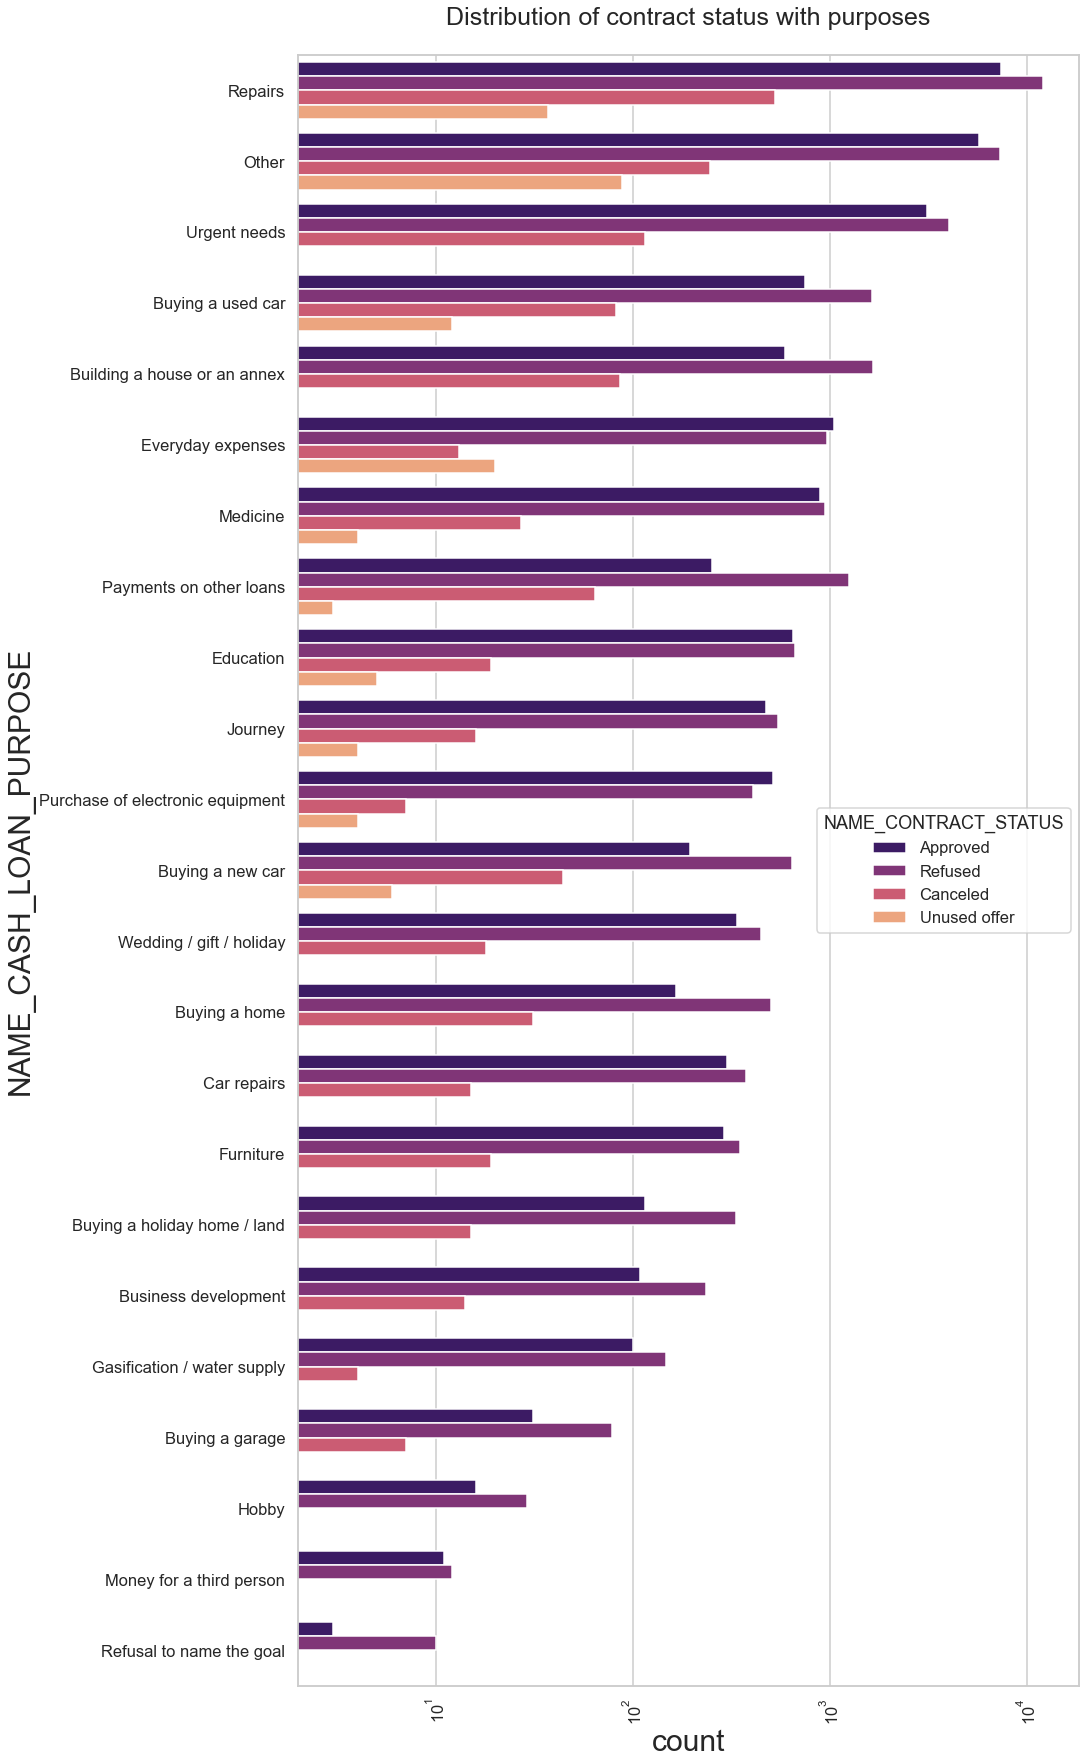

In [579]:
plt.figure(figsize=(14,30))
plt.rcParams["axes.labelsize"] = 30
plt.rcParams['axes.titlesize'] = 25
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of contract status with purposes')
ax_app_pre = sns.countplot(data = app_pre, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=app_pre['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='magma')

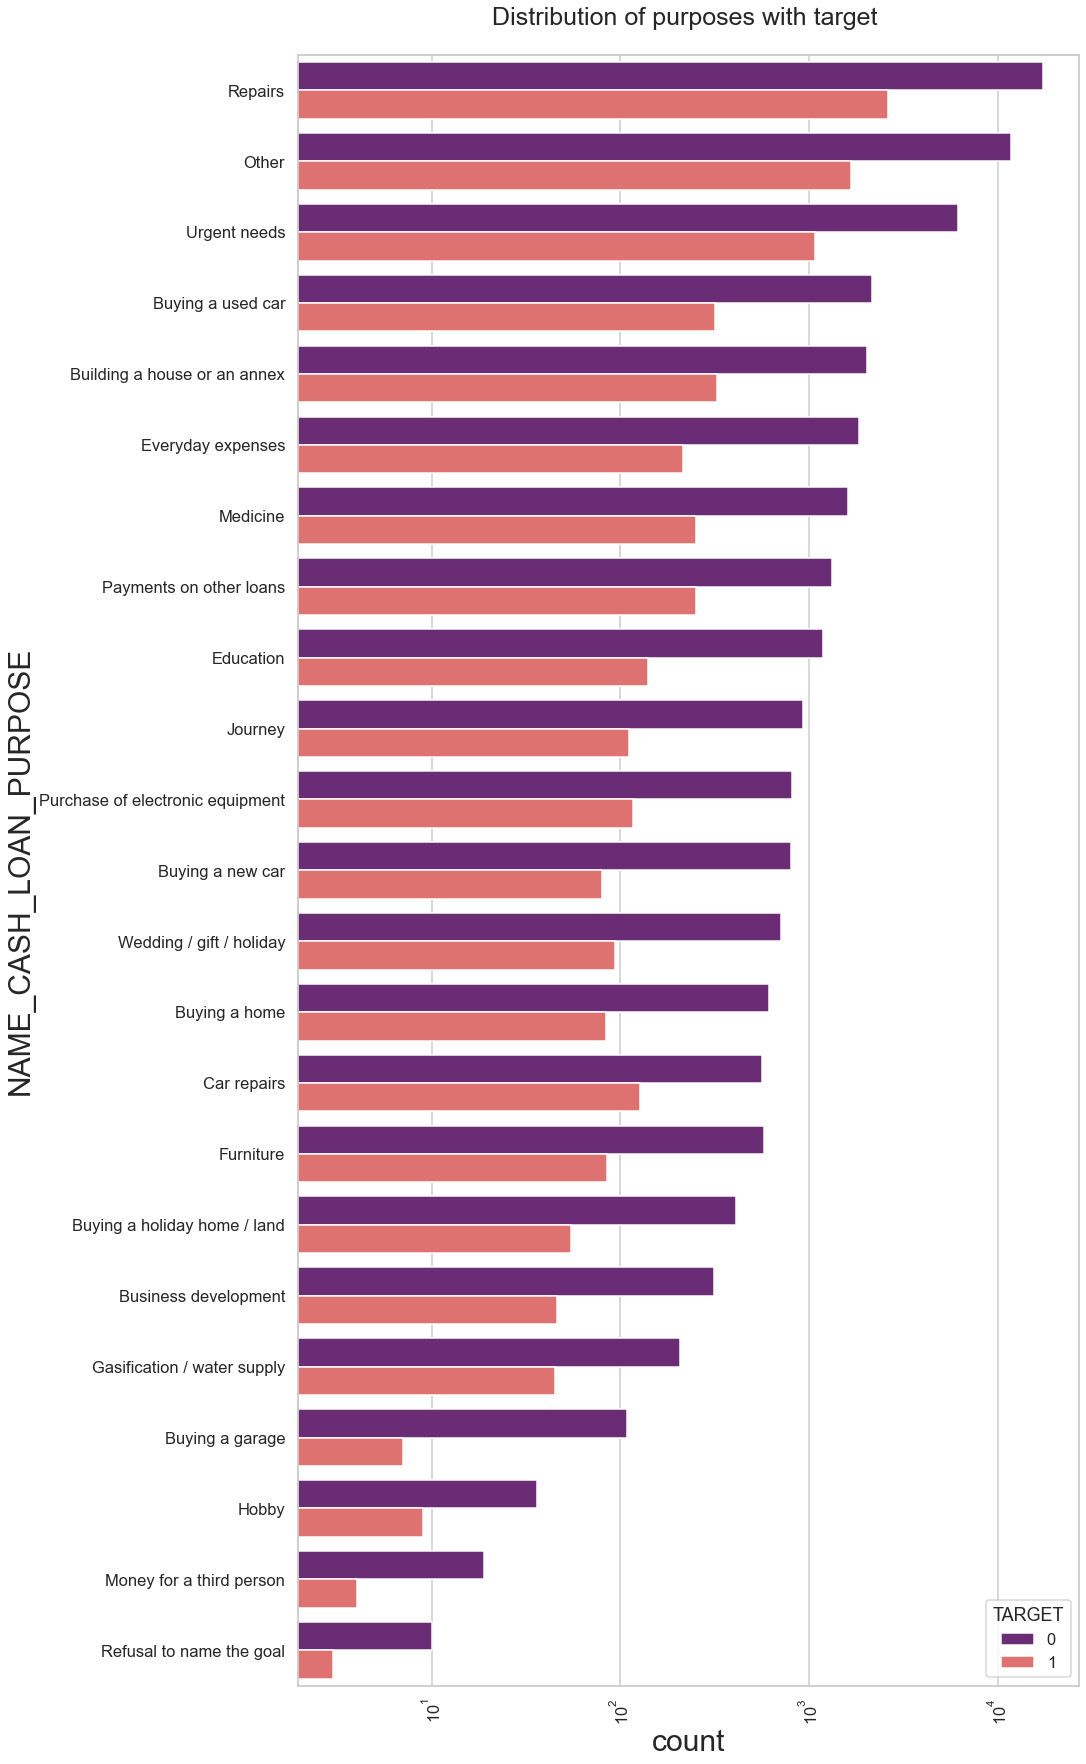

In [580]:
plt.figure(figsize=(14,30))
plt.rcParams["axes.labelsize"] = 30
plt.rcParams['axes.titlesize'] = 25
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of purposes with target ')
ax_app_pre = sns.countplot(data = app_pre, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=app_pre['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET',palette='magma') 

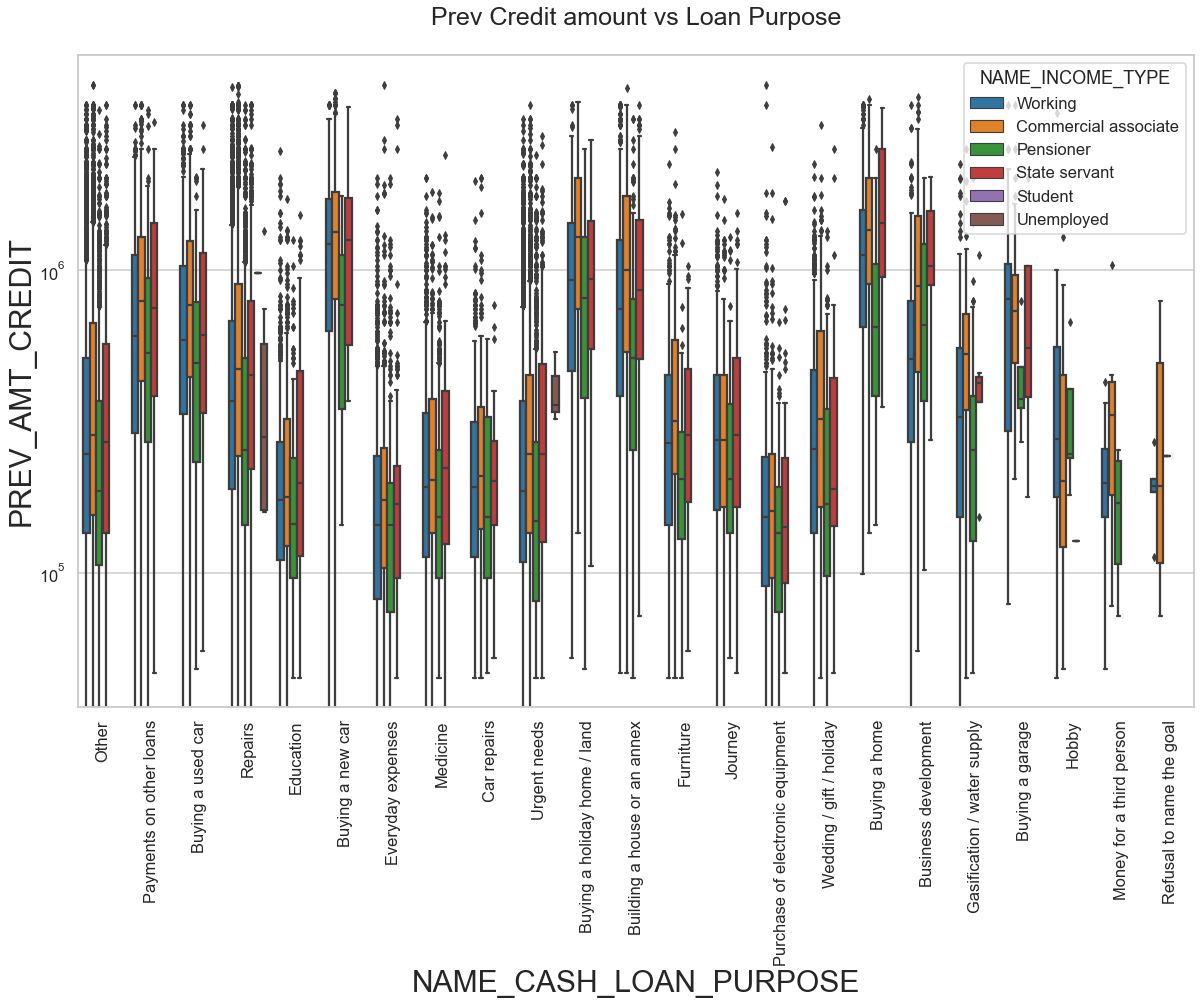

In [583]:
#plotting for Credit amount 

plt.figure(figsize=(20,12))
plt.xticks(rotation=90)
plt.yscale('log')
sns.boxplot(data =app_pre, x='NAME_CASH_LOAN_PURPOSE',hue='NAME_INCOME_TYPE',y='PREV_AMT_CREDIT',orient='v')
plt.title('Prev Credit amount vs Loan Purpose')
plt.show()

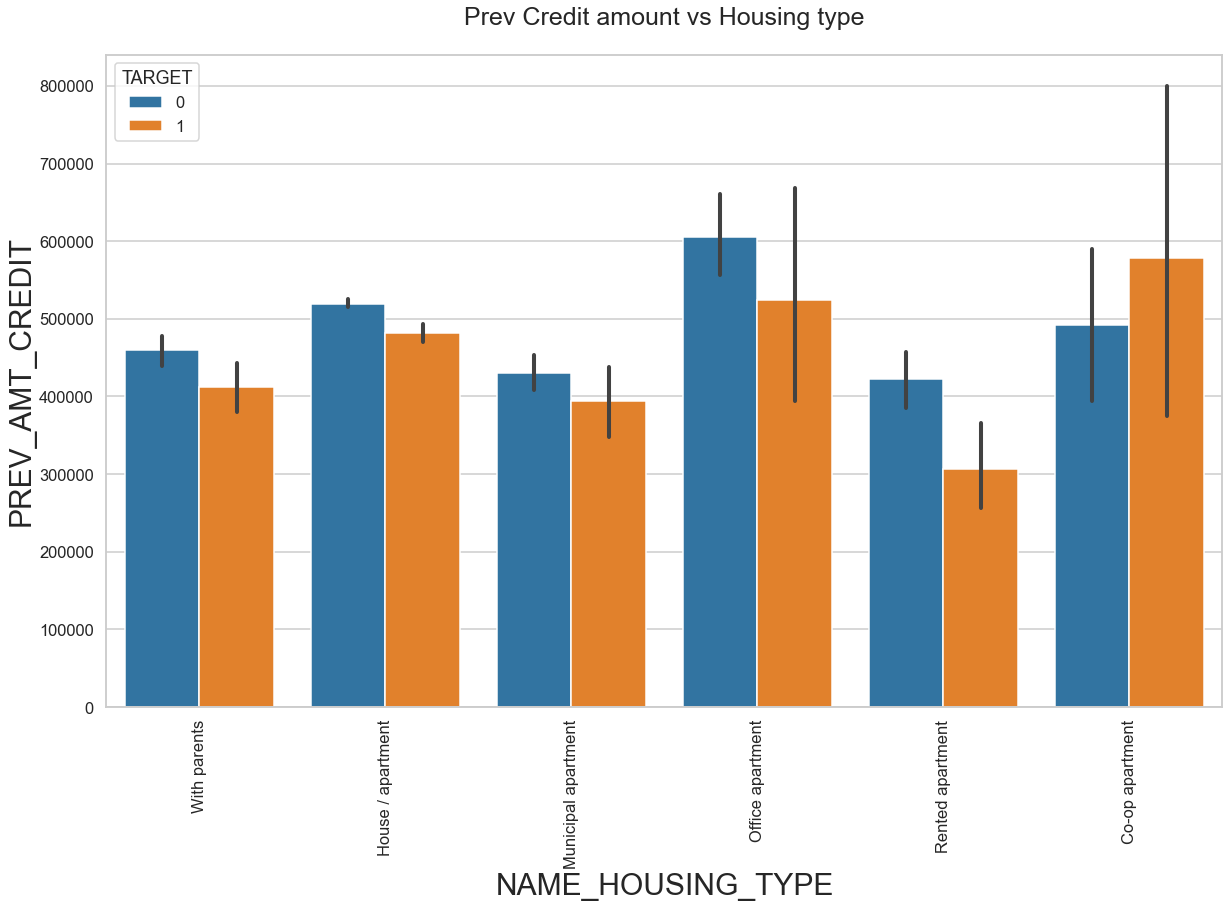

In [586]:
#plotting for  prev Credit amount vs Housing type 

plt.figure(figsize=(20,12))
plt.xticks(rotation=90)
sns.barplot(data =app_pre, y='PREV_AMT_CREDIT',hue='TARGET',x='NAME_HOUSING_TYPE')
plt.title('Prev Credit amount vs Housing type')
plt.show()

###### Conlcusion As Below:

1. Based on data Banks should focus more on contract type ‘Student’ ,’pensioner’ and ‘Businessman’ with housing ‘type other than ‘Co-op apartment’ for successful payments.
2. Banks should focus less on income type ‘Working’ as they are having most number of unsuccessful payments.
3. Also with loan purpose ‘Repair’ is having higher number of unsuccessful payments on time.
4. Get as much as clients from housing type ‘With parents’ as they are having least number of unsuccessful payments.
